In [226]:
import warnings
warnings.filterwarnings('ignore')

In [227]:
#from google.colab import drive
#drive.mount('/content/drive')

# ENOLYTICS

# Introduction 

Our customer is a wine producer who wants to know which are the features that impact the most on wine quality. Therefore he provided us with this dataset composed by 6497 observations and 14 features about both red and white wine. 

## Import libraries

In [228]:
# First we import all the necessary packages 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler

import random
random.seed(32)

# Data cleaning and preprocessing 

In [229]:
wine = pd.read_csv("C:/Users/111949/Desktop/Data mining data/Wine Quality/WineQuality.csv")
wine.head()

Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.0              0.27         0.36            20.7   
1           1            6.3              0.30         0.34             1.6   
2           2            8.1              0.28         0.40             6.9   
3           3            7.2              0.23         0.32             8.5   
4           4            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality   type  
0       0.45      8.8        6  white  
1       0.49      9.5        6  white  
2       0.44     10.1        6  white  
3       0.40      9.9        6  white  
4       0.40      9.9        6  white

In [230]:
print("There are {} observations and {} features in this dataset. \n".format(wine.shape[0], wine.shape[1]))

There are 6497 observations and 14 features in this dataset. 



We remove the column 'Unnamed 0' because it's an index and it does not provide us with any useful information. 

In [231]:
wine.drop(['Unnamed: 0'], axis=1, inplace=True)

In [232]:
print("There are {} observations and {} features now. \n".format(wine.shape[0], wine.shape[1]))

There are 6497 observations and 13 features now. 



In [233]:
# We check for missing values 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [234]:
# Then we check if there are duplicated values
wine.duplicated().sum()

1177

Our dataset contains 1177 duplicates. They represent almost 20% of our data and we have few observations,in particular of red wines, so we decide to keep them.

In [235]:
# printing types for each column 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [236]:
# Printing summary statistics for the columns
wine.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     6497.000000       6497.000000  6497.000000     6497.000000   
unique            NaN               NaN          NaN             NaN   
top               NaN               NaN          NaN             NaN   
freq              NaN               NaN          NaN             NaN   
mean         7.215307          0.339666     0.318633        5.443235   
std          1.296434          0.164636     0.145318        4.757804   
min          3.800000          0.080000     0.000000        0.600000   
25%          6.400000          0.230000     0.250000        1.800000   
50%          7.000000          0.290000     0.310000        3.000000   
75%          7.700000          0.400000     0.390000        8.100000   
max         15.900000          1.580000     1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count   6497.000000          6497.000000           6497.000000  6497.000000   
unique          NaN                  NaN                   NaN          NaN   
top             NaN                  NaN                   NaN          NaN   
freq            NaN                  NaN                   NaN          NaN   
mean       0.056034            30.525319            115.744574     0.994697   
std        0.035034            17.749400             56.521855     0.002999   
min        0.009000             1.000000              6.000000     0.987110   
25%        0.038000            17.000000             77.000000     0.992340   
50%        0.047000            29.000000            118.000000     0.994890   
75%        0.065000            41.000000            156.000000     0.996990   
max        0.611000           289.000000            440.000000     1.038980   

                 pH    sulphates      alcohol      quality   type  
count   6497.000000  6497.000000  6497.000000  6497.000000   6497  
unique          NaN          NaN          NaN          NaN      2  
top             NaN          NaN          NaN          NaN  white  
freq            NaN          NaN          NaN          NaN   4898  
mean       3.218501     0.531268    10.491801     5.818378    NaN  
std        0.160787     0.148806     1.192712     0.873255    NaN  
min        2.720000     0.220000     8.000000     3.000000    NaN  
25%        3.110000     0.430000     9.500000     5.000000    NaN  
50%        3.210000     0.510000    10.300000     6.000000    NaN  
75%        3.320000     0.600000    11.300000     6.000000    NaN  
max        4.010000     2.000000    14.900000     9.000000    NaN

## OUTLIERS

First of all, we plotted the distribution of all variables together; since they have different scales, some boxplots appear flattened, while 3 (total sulfur dioxide, free sulfur dioxide and residual sugar) are bigger and show some points which may be critical. 

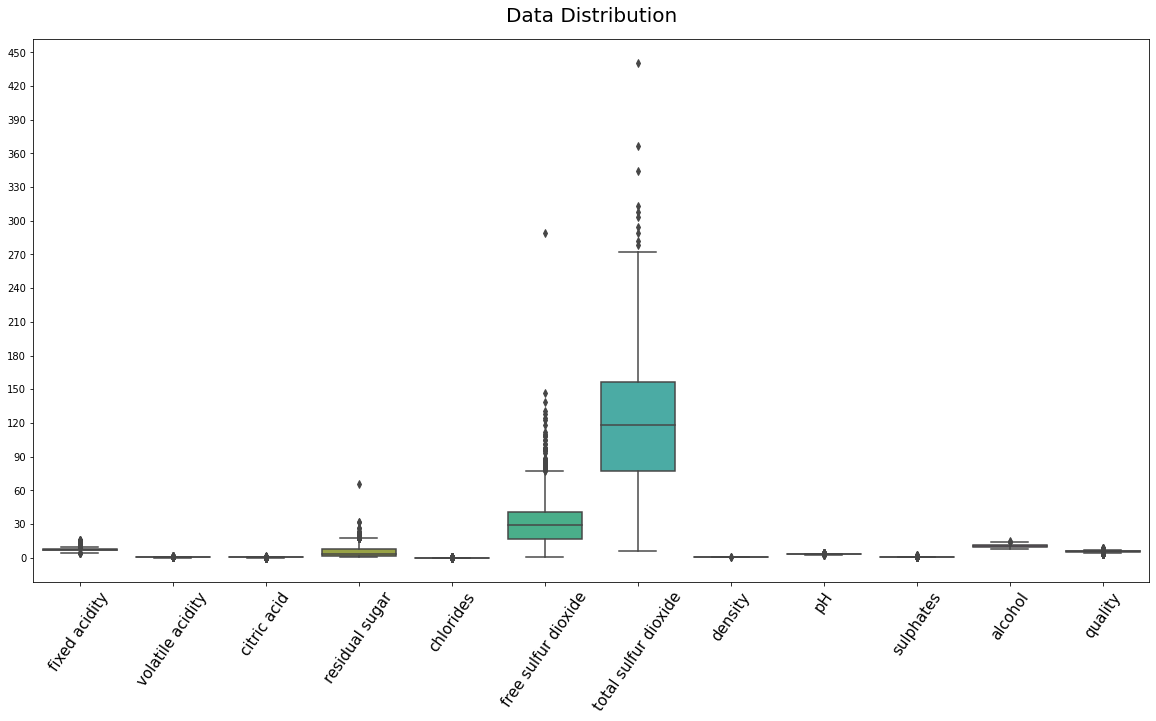

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(data=wine)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

We will now plot the boxplots of the variables that appeared flattened in order to understand better their distribution. 

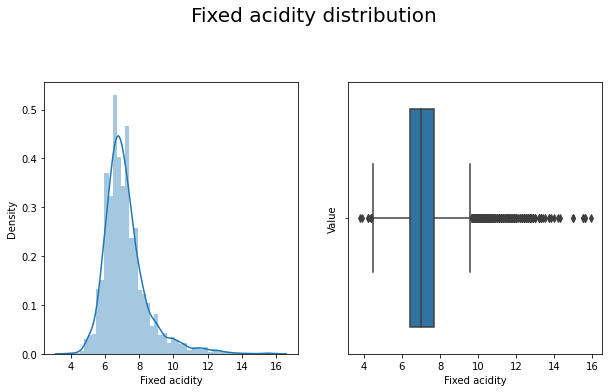

In [13]:
data=wine['fixed acidity']
label='Fixed acidity'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

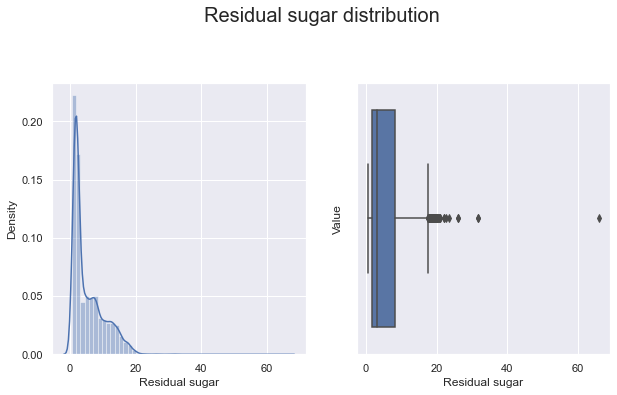

In [237]:
data=wine['residual sugar']
label='Residual sugar'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

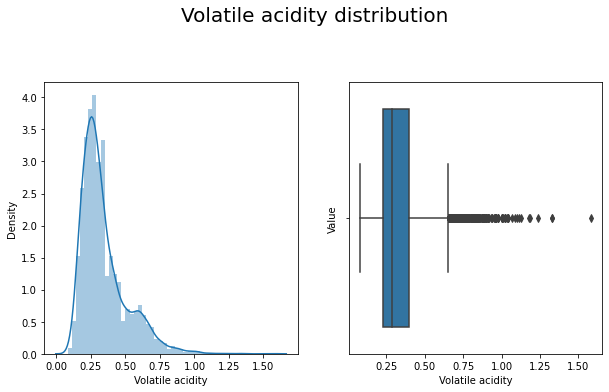

In [14]:
data=wine['volatile acidity']
label='Volatile acidity'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

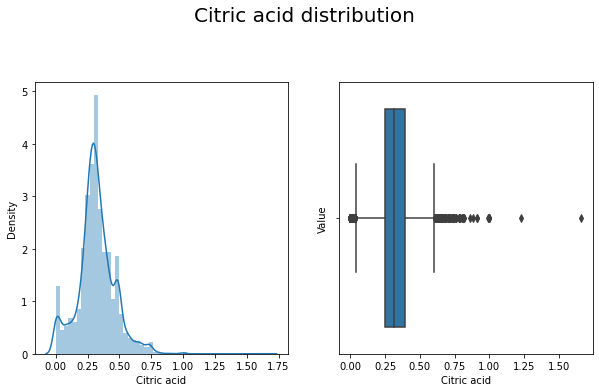

In [15]:
data=wine['citric acid']
label='Citric acid'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

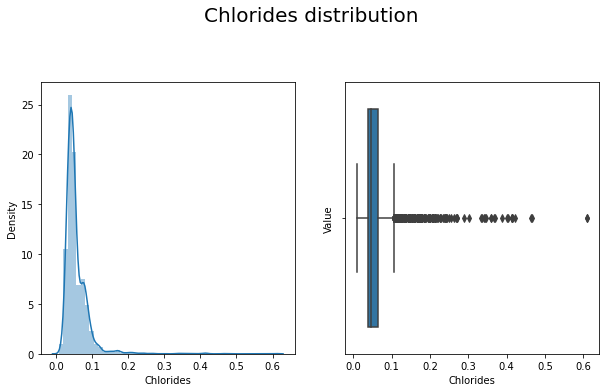

In [16]:
data=wine['chlorides']
label='Chlorides'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

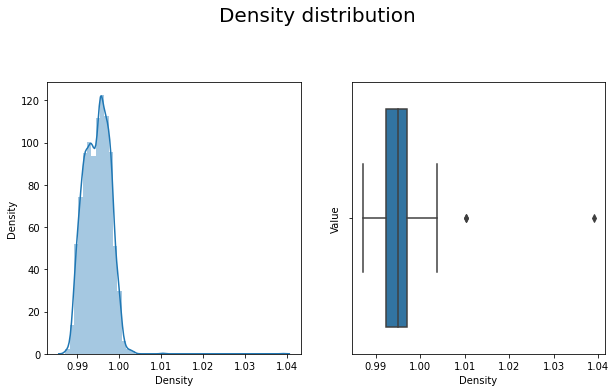

In [17]:
data=wine['density']
label='Density'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

# in this plot we notice a value that is out of the range of density; 

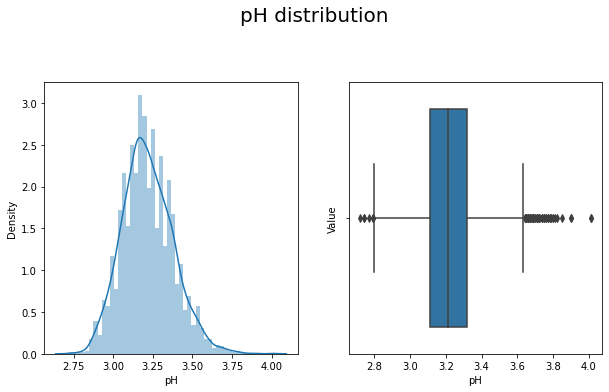

In [18]:
data=wine['pH']
label='pH'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

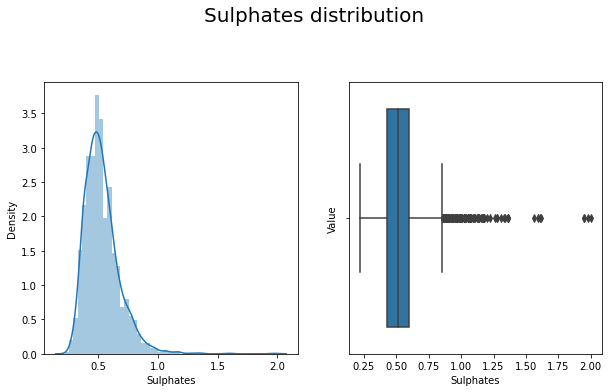

In [19]:
data=wine['sulphates']
label='Sulphates'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

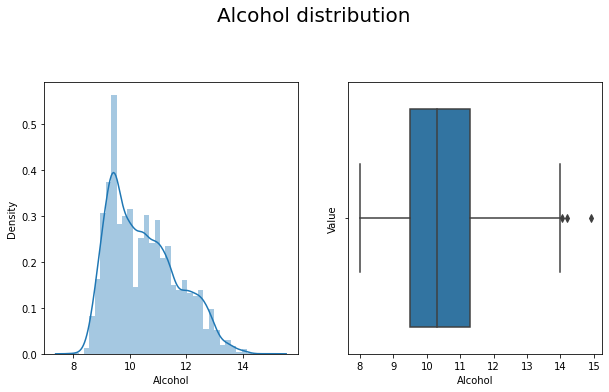

In [20]:
data=wine['alcohol']
label='Alcohol'
title= label+ ' distribution'

fig, axs = plt.subplots(1,2, figsize=(10,5))
plt.suptitle(title, y = 1.09, fontsize=20)

sns.distplot(data, ax=axs[0])
sns.boxplot(data, orient='v',ax=axs[1])
axs[0].set_ylabel('Density')
axs[1].set_ylabel('Value')
axs[0].set_xlabel(label)
axs[1].set_xlabel(label)
fig.show()

In [21]:
# to see distribution of data (0 is for a normal distribution)
wine.kurtosis(axis=0)

fixed acidity            5.061161
volatile acidity         2.825372
citric acid              2.397239
residual sugar           4.359272
chlorides               50.898051
free sulfur dioxide      7.906238
total sulfur dioxide    -0.371664
density                  6.606067
pH                       0.367657
sulphates                8.653699
alcohol                 -0.531687
quality                  0.232322
dtype: float64

We see that almost all the distributions are skewed on the right, therefore it is difficult to determine whether there are outliers. Moreover, the data contain both information on red and white wine, so we suppose that some values might look abnormal also due to this distinction.   
In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we should not simply delete the outlying observation before a thorough investigation.  
Finally, since we have few observations we decided not to drop all of the suspected outliers, but only those that may affect the results of our analysis more heavily. 

In [22]:
# REMOVE OUTLIERS

cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

for c in cols:
    upper_level = wine[c].mean() + 3*wine[c].std()
    lower_level = wine[c].mean() - 3*wine[c].std()
    wine = wine[(wine[c] > lower_level) & (wine[c] < upper_level)]

In [23]:
print('Number of rows in the dataset after outliers were removed: {} '.format(wine.shape[0]))
print('We removed {} rows'.format(6497-wine.shape[0]))

Number of rows in the dataset after outliers were removed: 6430 
We removed 67 rows


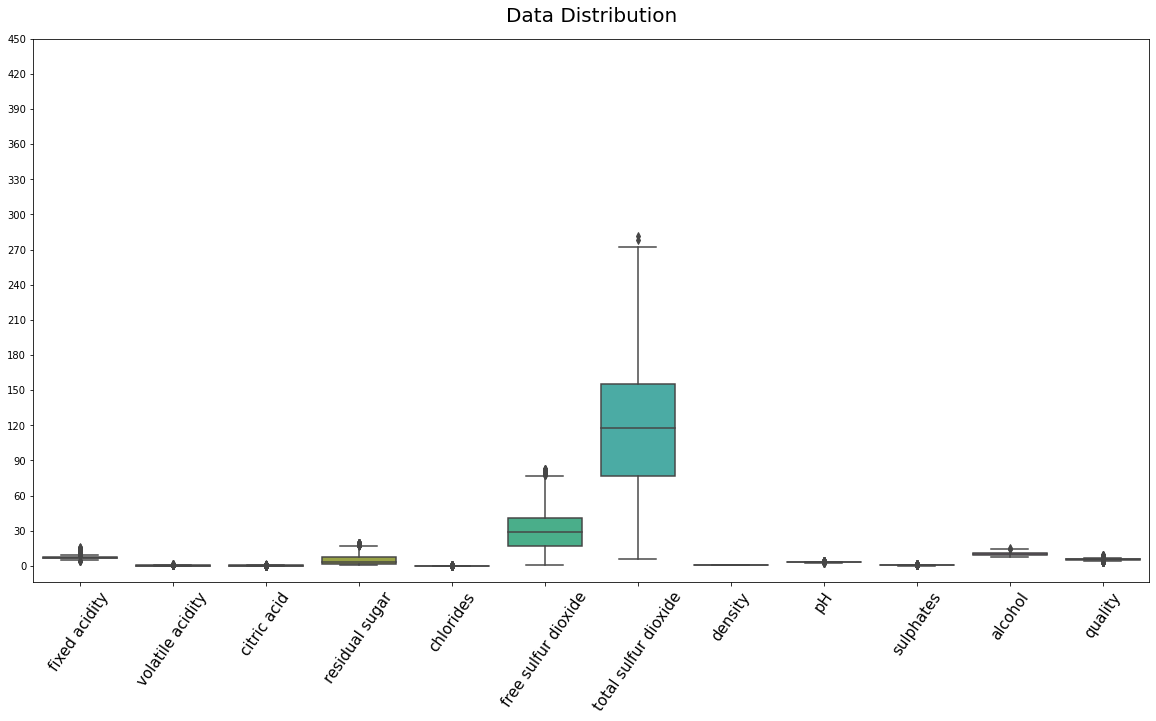

In [24]:
# data distribution after outliers removal 
plt.figure(figsize=(20,10))
sns.boxplot(data=wine)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

# Exploratory data analysis and visualization

white    4832
red      1598
Name: type, dtype: int64


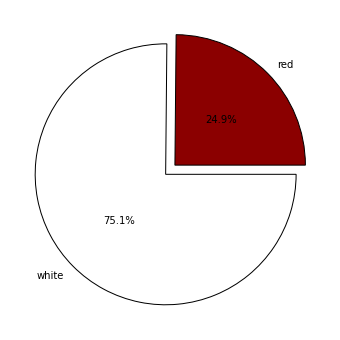

In [25]:
# Pie chart on wine type 
print(wine['type'].value_counts())

data = wine.groupby('type')['quality'].count()
fig, ax = plt.subplots(figsize=[10,6])
labels = ['red','white']
ax = plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['darkred','white'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)
plt.show()

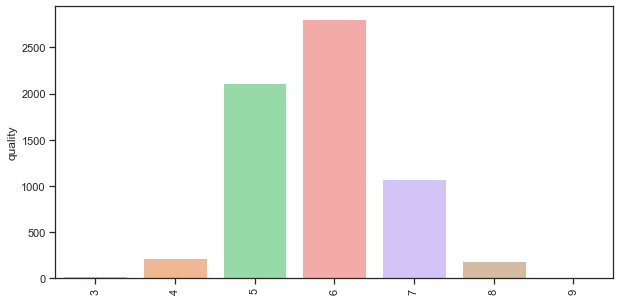

In [26]:
# barplot of wines by quality
quality =  pd.DataFrame(wine.quality.value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
ax = sns.barplot(x = quality.index, y = 'quality' , data = quality)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64


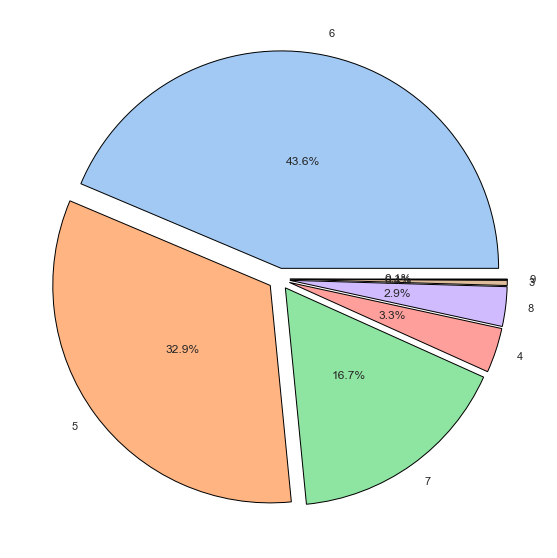

In [27]:
# Pie chart for a more precise exploration
print(wine['quality'].value_counts())

data = wine['quality'].value_counts()
fig, ax = plt.subplots(figsize=[15,10])
labels = ['6','5', '7','4','8','3','9']
ax = plt.pie(x=data, autopct="%.1f%%", labels=labels, wedgeprops={"edgecolor":"black"},pctdistance=0.5, explode=[0.05]*7)

From the last two plots we can see that quality, which is our response variable, is highly unbalanced: for instance class three and nine contain very few observations.   
Wine quality values appear to follow a fairly normal, bell shaped distribution, centered around a value of six. This makes sense intuitively, because most wines are of average quality, while only few are particularly bad or good.   


We now plot each variables with respect to quality. This should give us insights on the relationship between each variables and the response, and about the differences between red and white wines.  

<AxesSubplot:xlabel='type', ylabel='quality'>

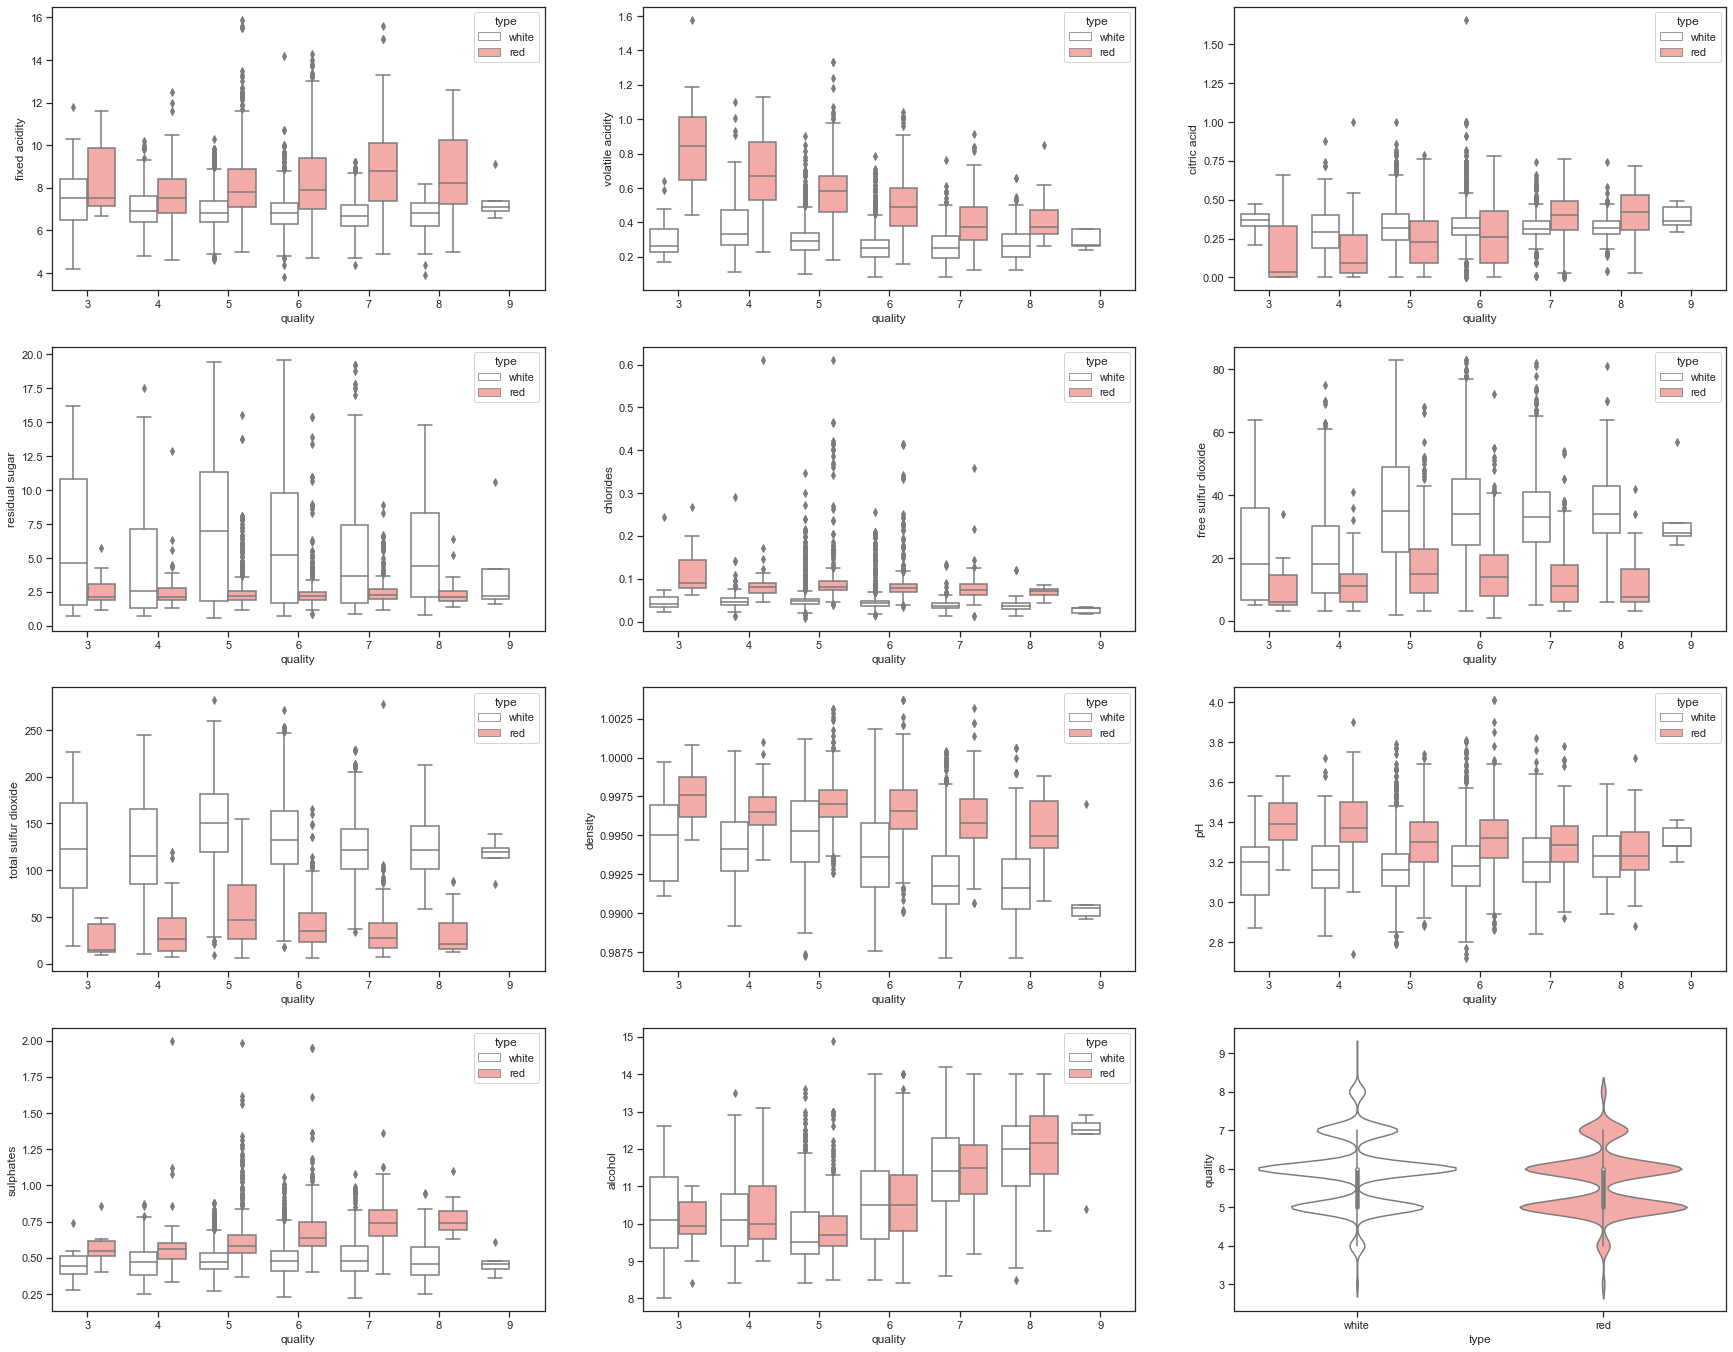

In [28]:
colors = ['w', 'r']
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(4, 3, figsize=(30,24))

sns.boxplot(ax = axes[0,0], data=wine,y='fixed acidity',x='quality', hue='type')
sns.boxplot(ax = axes[0,1], data=wine,y='volatile acidity',x='quality',hue='type')
sns.boxplot(ax = axes[0,2], data=wine,y='citric acid',x='quality', hue='type')
sns.boxplot(ax = axes[1,0], data=wine,y='residual sugar',x='quality', hue='type')
sns.boxplot(ax = axes[1,1], data=wine,y='chlorides',x='quality', hue='type')
sns.boxplot(ax = axes[1,2], data=wine,y='free sulfur dioxide',x='quality', hue='type')
sns.boxplot(ax = axes[2,0], data=wine,y='total sulfur dioxide',x='quality', hue='type')
sns.boxplot(ax = axes[2,1], data=wine,y='density',x='quality', hue='type')
sns.boxplot(ax = axes[2,2], data=wine,y='pH',x='quality', hue='type')
sns.boxplot(ax = axes[3,0], data=wine,y='sulphates',x='quality', hue='type')
sns.boxplot(ax = axes[3,1], data=wine,y='alcohol',x='quality', hue='type')
sns.violinplot(data=wine ,x=wine.type ,y=wine.quality)

- For each variable, red and white wines show different characteristics and sometimes also slightly different behaviours (excepted for Alchool)  
- For the Fixed acidity variable we can denote that red wines have higher values compared to those of white wines. 
- For the Volatile acidity the values diminish as the quality increases for red wines. This pattern does not hold for white ones.  
- Citric Acid values are more variable for red wines and increase as quality increases. For white ones this covariate is pretty costant.  
- Residual sugar values are extremely variable for white wines, but they are constant both for white ones and for red ones as quality increases.  
- Chlorides are constant in pattern for both wines. However they are more present in red wines.  
- Free sulfure dioxide are more present in white wines. There are no clear patterns.  
- Total sulfure dioxide are more present in white wines. There are no clear patterns.  
- Regarding density, red wines have bigger values. Whilst white wines show a decreasing pattern. 
- PH is pretty similar in values between the two types of wine. As the quality increases, the PHs tend to converge.  
- Sulphates are higher in red wines and they increase with the quality.  
- The alcohol covariate has values similar between the two types of wines and the same pattern as well: positive relationship with quality.
- We have an unbalanced dataset.
- The highest quality is only achieved by white one (see last plot);



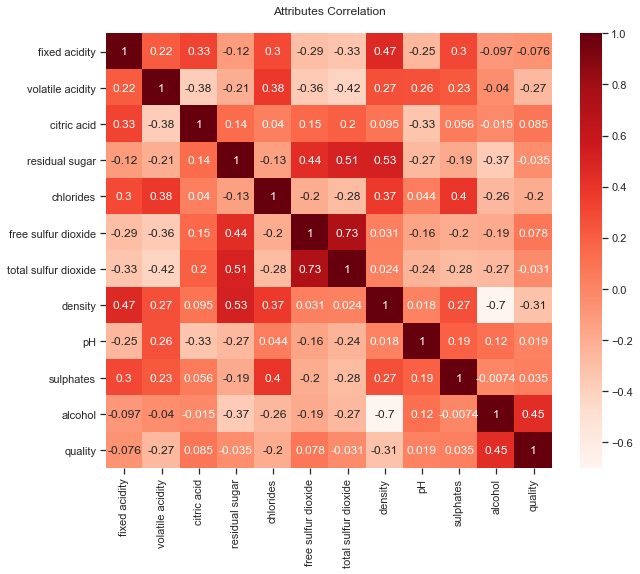

In [29]:
# We compute the correlation matrix to see correlation between couples of variables
correlations = wine.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

Total sulfur dioxide and Free sulfur dioxide show the highest correlation level (+0.73); this makes sense as Free sulfurs are contained in the portion of total sulfurs, so when free sulfurs increase, also total sulfurs do- they convey the same information.   
In order to deal with this problem, we are going to create a new variable defined as the ratio between the two measures (*sulfur dioxide ratio*). 

In order to solve the problem concerning unbalanced quality classes, we decide to group them in 3 main cetegories:  
- Low (3+ 4+ 5)  
- Medium (6)  
- High (7+8+9)

In [30]:
wine['quality'] = wine.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 6 else 'high')

In [31]:
# Now classes are less unbalanced
qualitycounts=wine['quality'].value_counts()
print(qualitycounts)

medium    2806
low       2355
high      1269
Name: quality, dtype: int64


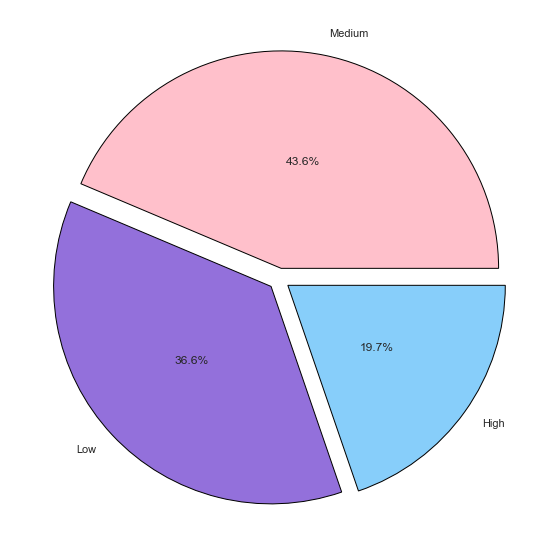

In [32]:
data = wine['quality'].value_counts()
fig, ax = plt.subplots(figsize=[15,10])
labels = ['Medium','Low', 'High']
ax = plt.pie(x=[qualitycounts[0], qualitycounts[1], qualitycounts[2]], autopct="%.1f%%",wedgeprops={"edgecolor":"black"},pctdistance=0.5, explode=[0.05]*3, labels=labels, colors=['pink', 'mediumpurple','lightskyblue'])

In order to gain some further useful insights, we perform some feature enginering on our variables.   
We create two ner variables:  
- Molecular $SO_2$: the effectiveness of the SO2 to protect the wine from oxidation and microbial spoilage is dependant upon the pH of the wine. This variable can give us information about the wine.   
- Sulfur dioxide ratio: we create this variable to solve the correlation problem between free and total sulfur, and we drop those two variables so that the information is used only once. 

In [33]:
wine['m_so2'] = wine['free sulfur dioxide'] / (1+10**(wine['pH']-1.81))

In [34]:
wine['sulfur dioxide ratio'] = wine['free sulfur dioxide'] / wine['total sulfur dioxide']
wine.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True) #dropping total and free sulfur 

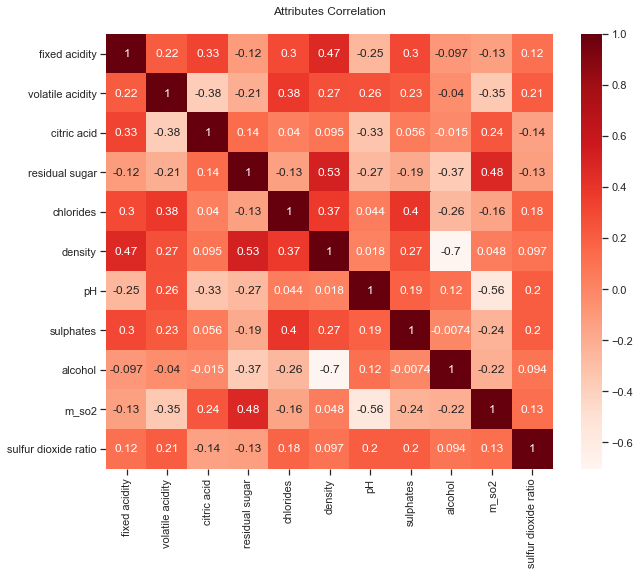

In [35]:
# Check again on correlation matrix
correlations = wine.corr() 

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

We notice that correlation levels are now lower. 

In previous analysis we noticed that red and white wines have different behaviours, so from now on we decide to split them. 

In [36]:
# We split the dataset into red wine and white wine
white = wine[wine.type == 'white']
red = wine[wine.type == 'red']

white.drop(['type'], axis=1, inplace=True)
red.drop(['type'], axis=1, inplace=True)

# WHITE DATASET

In [37]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

   density    pH  sulphates  alcohol quality     m_so2  sulfur dioxide ratio  
1   0.9940  3.30       0.49      9.5  medium  0.438831              0.106061  
2   0.9951  3.26       0.44     10.1  medium  1.027967              0.309278  
3   0.9956  3.19       0.40      9.9  medium  1.880878              0.252688  
4   0.9956  3.19       0.40      9.9  medium  1.880878              0.252688  
5   0.9951  3.26       0.44     10.1  medium  1.027967              0.309278

 We check correlation on the white dataset. We see that density and residual sugar are highly correlated (+ 0.83) and also density and alcohol (-0.81).  

 

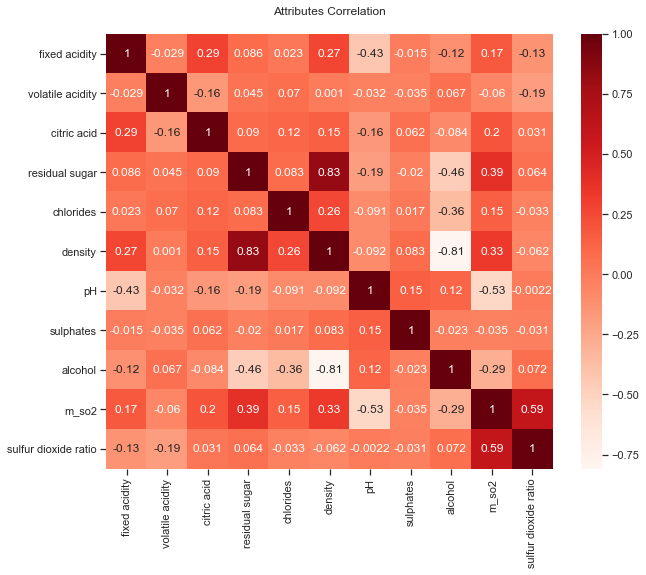

In [38]:
correlations = white.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

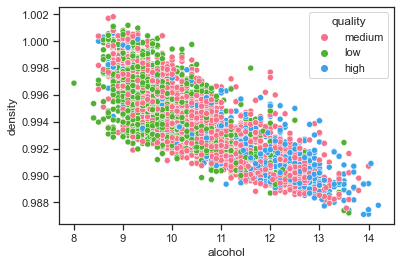

In [39]:
# Plot of correlation between density and alchol 
ax = sns.scatterplot(x="alcohol", y="density", hue= 'quality',data=white)
plt.show()

We can notice that low quality wines (green dots) tend to have lower levels of alcohol and they are equally distributed across density.

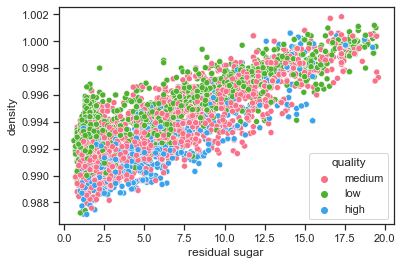

In [40]:
# Plot of correlation between density and residual sugar 
ax = sns.scatterplot(x="residual sugar", y="density", hue= 'quality',data=white)
plt.show()

From this plot we can notice that low quality white wines tend to have higher density than high quality white wines.

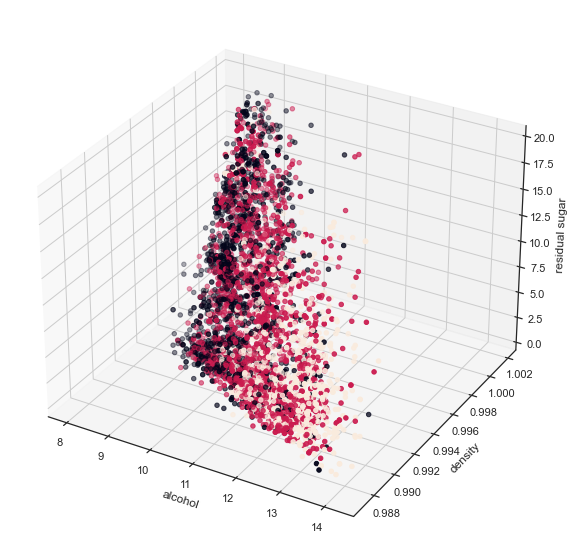

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x =white['alcohol']
y =white['density']
z =white['residual sugar']

quality=white['quality'].tolist()
colors=list()

for q in quality:
    if q == 'low':
        colors.append(0)
    if q == 'medium':
        colors.append(1)
    if q == 'high':
        colors.append(2)

ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('alcohol')
ax.set_ylabel('density')
ax.set_zlabel('residual sugar')

plt.show()

To better analyze the collinearity problem, we compute the VIF on all the variables. This should tell us how much a variable is correlated with all the others. 

In [42]:
white_vif=white.copy()

In [43]:
white_vif.drop(['quality'],axis=1, inplace=True)

In [44]:
vif_data_white = pd.DataFrame() 

vif_data_white["feature"] = white_vif.columns 

vif_data_white["VIF"] = [variance_inflation_factor(white_vif.values, i) 
                          for i in range(len(white_vif.columns))] 
print(vif_data_white)

                 feature          VIF
0          fixed acidity    92.534214
1       volatile acidity     9.691671
2            citric acid    10.255743
3         residual sugar     3.945749
4              chlorides     6.477443
5                density  1517.461376
6                     pH   974.793157
7              sulphates    20.410042
8                alcohol   119.188269
9                  m_so2    15.429099
10  sulfur dioxide ratio    21.753392


The high VIF values are related to multicollinearity problems among our variables. Collinearity is affecting density and pH , but not residual sugar as we thought it would. Hence, VIF values would suggest to drop density, while high values for pH might indicate that it is related to some other variables.  

We know that collinearity could affect the stability of estimates of parametric models (logistic),but not that of non-parametric models (trees, RF, xgboost ecc). We decide to drop density from our dataset of white wines only for parametric models.

In [45]:
# Drop density
whitenodens=white.copy()
whitenodens.drop(['density'], axis=1, inplace=True)
whitenodens.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

     pH  sulphates  alcohol quality     m_so2  sulfur dioxide ratio  
1  3.30       0.49      9.5  medium  0.438831              0.106061  
2  3.26       0.44     10.1  medium  1.027967              0.309278  
3  3.19       0.40      9.9  medium  1.880878              0.252688  
4  3.19       0.40      9.9  medium  1.880878              0.252688  
5  3.26       0.44     10.1  medium  1.027967              0.309278

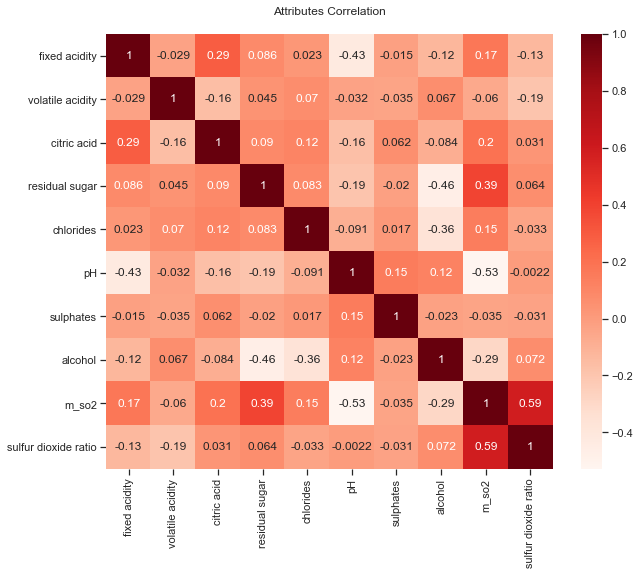

In [46]:
# Correlation matrix after density removal

correlations = whitenodens.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

As we expected, after density removal correlation values are lower.   
Now we check again VIF on the dataset

In [47]:
whitenodens_vif=whitenodens.copy()

In [48]:
whitenodens_vif.drop(['quality'],axis=1, inplace=True)

In [49]:
vif_nodens = pd.DataFrame() 

vif_nodens["feature"] = whitenodens_vif.columns 

vif_nodens["VIF"] = [variance_inflation_factor(whitenodens_vif.values, i) 
                          for i in range(len(whitenodens_vif.columns))] 
print(vif_nodens)

                feature         VIF
0         fixed acidity   66.530175
1      volatile acidity    9.683798
2           citric acid   10.232996
3        residual sugar    3.840009
4             chlorides    6.250486
5                    pH  171.090846
6             sulphates   20.388711
7               alcohol   97.369703
8                 m_so2   11.011780
9  sulfur dioxide ratio   19.531908


Now values for VIF are better.

Now we do some exploratory plots for white wine. 

In [50]:
whitenodens.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

     pH  sulphates  alcohol quality     m_so2  sulfur dioxide ratio  
1  3.30       0.49      9.5  medium  0.438831              0.106061  
2  3.26       0.44     10.1  medium  1.027967              0.309278  
3  3.19       0.40      9.9  medium  1.880878              0.252688  
4  3.19       0.40      9.9  medium  1.880878              0.252688  
5  3.26       0.44     10.1  medium  1.027967              0.309278

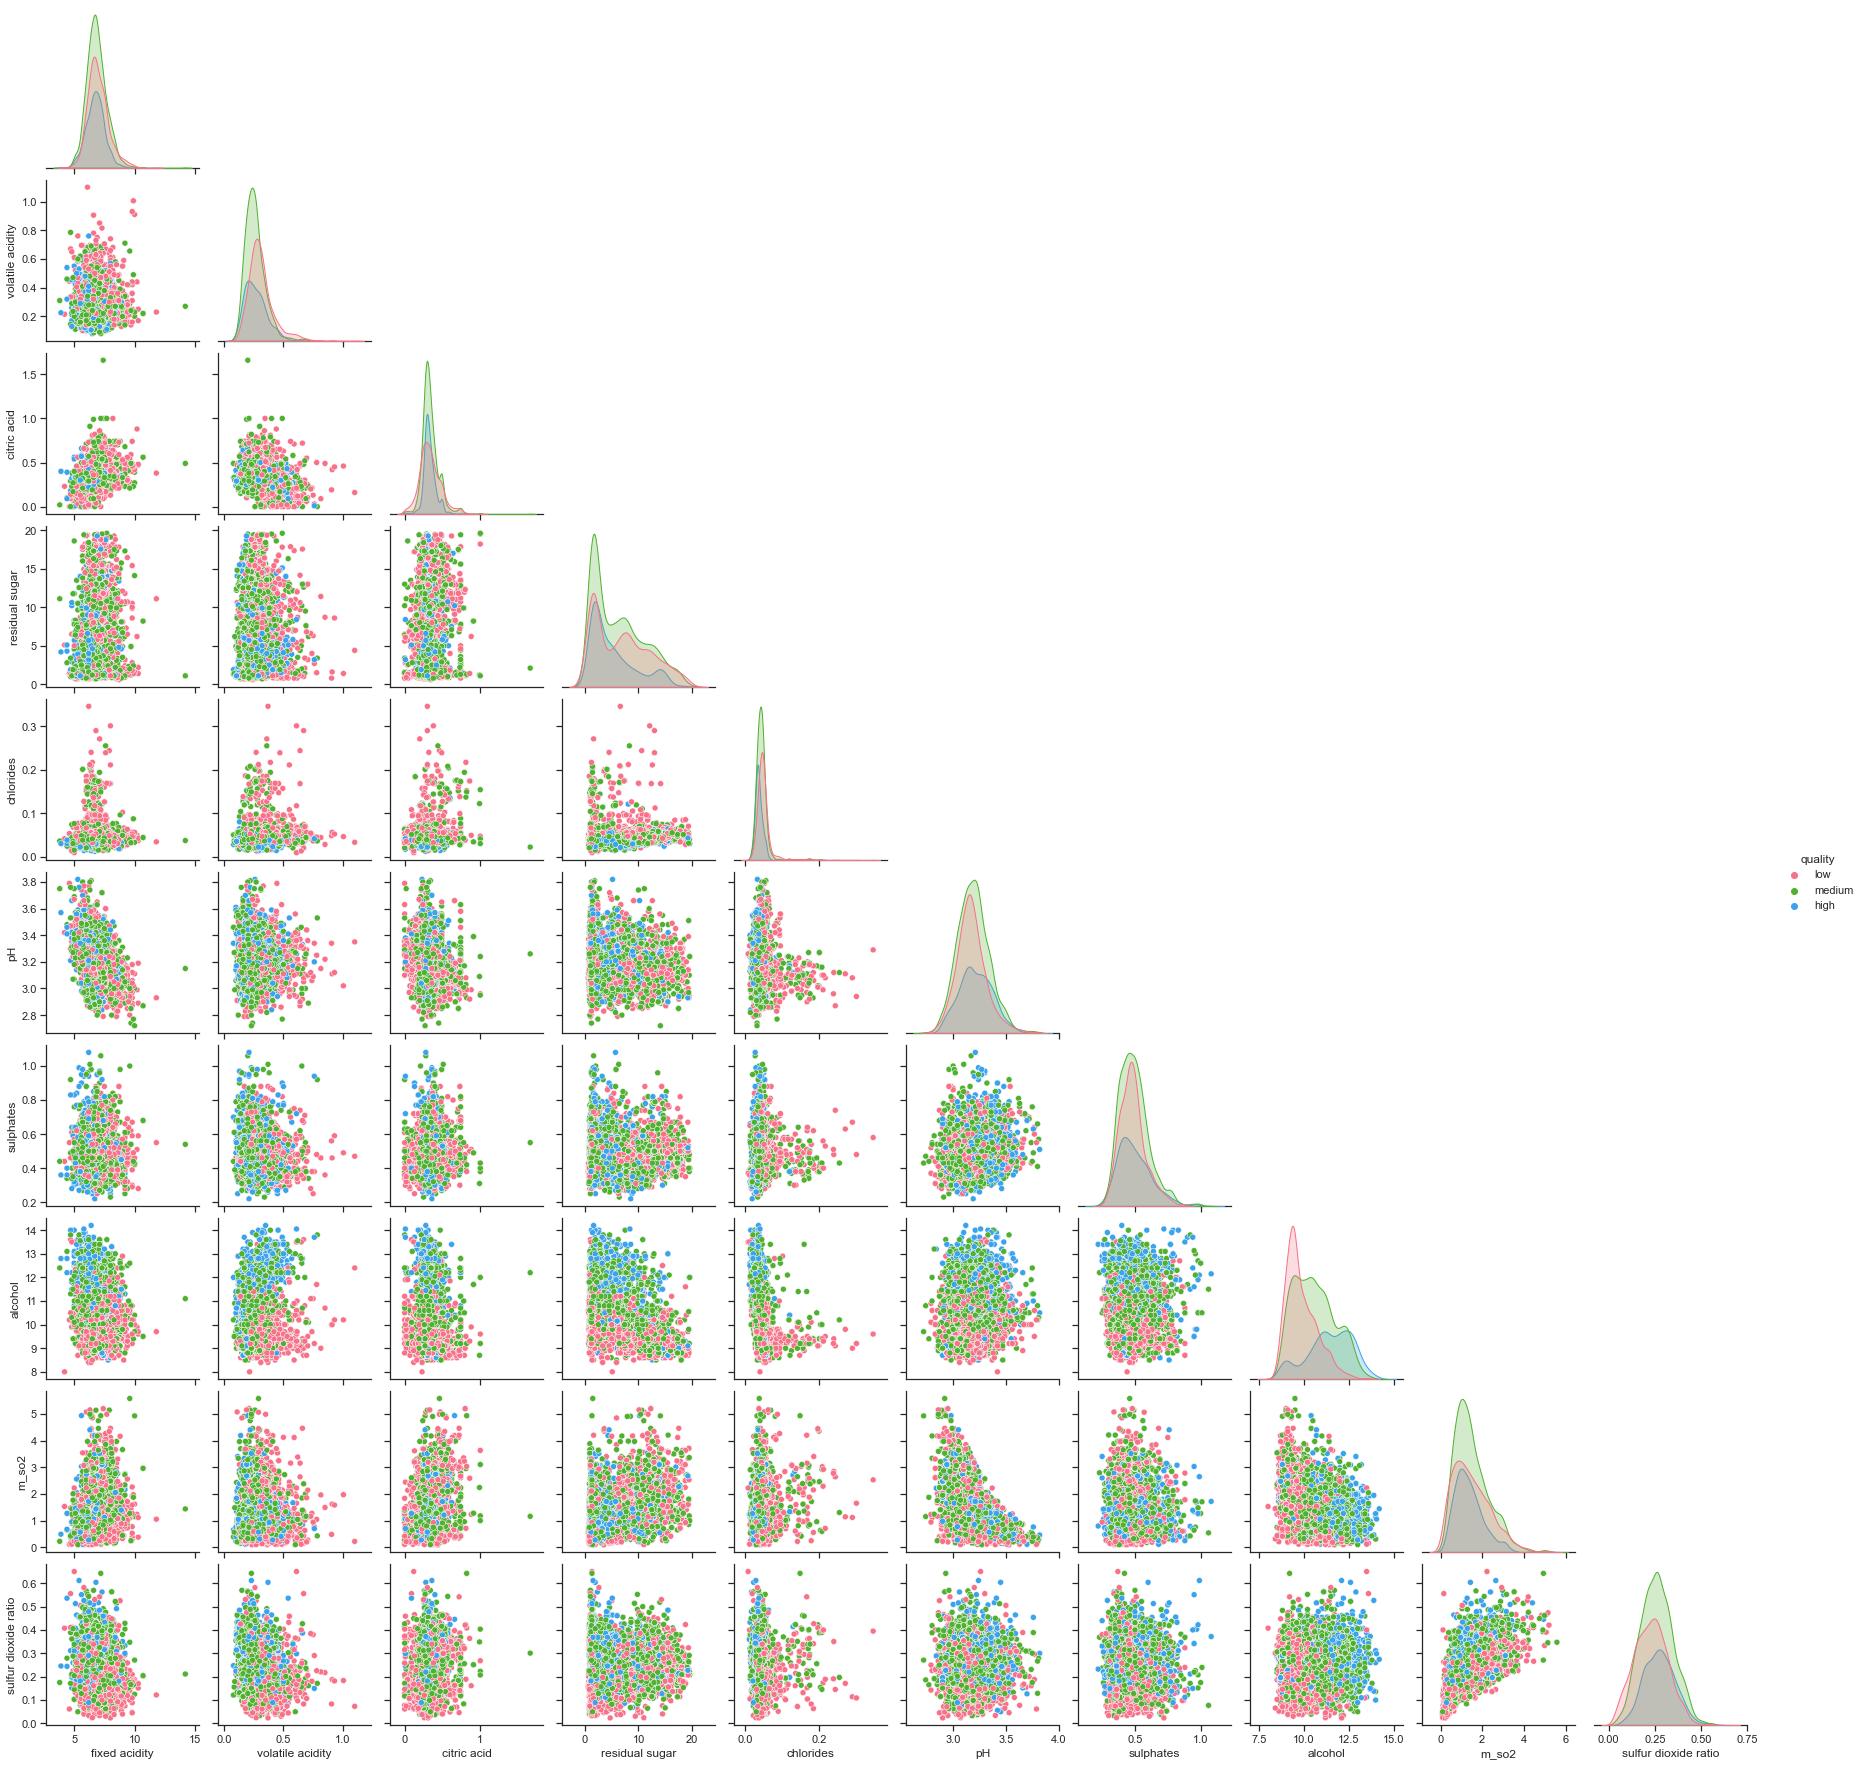

In [51]:
sns.pairplot(whitenodens, hue='quality', hue_order=['low', 'medium', 'high'], palette='husl', corner=True)

Density of alchol is quite different between the 3 classes

In [52]:
whitenodens_attributes = whitenodens.columns

ls_w = round(whitenodens[whitenodens['quality'] == 'low'][whitenodens_attributes].describe(),2)
ms_w = round(whitenodens[whitenodens['quality'] == 'medium'][whitenodens_attributes].describe(),2)
hs_w = round(whitenodens[whitenodens['quality'] == 'high'][whitenodens_attributes].describe(),2)
pd.concat([ls_w, ms_w, hs_w], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T

Low Quality Wine                                       \
                                count  mean   std   min   25%   50%    75%   
fixed acidity                  1611.0  6.96  0.88  4.20  6.40  6.80   7.50   
volatile acidity               1611.0  0.31  0.11  0.10  0.24  0.29   0.35   
citric acid                    1611.0  0.33  0.14  0.00  0.24  0.32   0.41   
residual sugar                 1611.0  6.98  5.18  0.60  1.70  6.60  11.00   
chlorides                      1611.0  0.05  0.03  0.01  0.04  0.05   0.05   
pH                             1611.0  3.17  0.14  2.79  3.08  3.16   3.24   
sulphates                      1611.0  0.48  0.10  0.25  0.41  0.47   0.53   
alcohol                        1611.0  9.85  0.87  8.00  9.20  9.60  10.40   
m_so2                          1611.0  1.50  0.92  0.09  0.78  1.34   2.05   
sulfur dioxide ratio           1611.0  0.23  0.09  0.02  0.16  0.23   0.29   

                            Medium Quality Wine         ...                \
                        max               count   mean  ...    75%    max   
fixed acidity         11.80              2168.0   6.84  ...   7.30  14.20   
volatile acidity       1.10              2168.0   0.26  ...   0.30   0.78   
citric acid            1.00              2168.0   0.34  ...   0.38   1.66   
residual sugar        19.45              2168.0   6.29  ...   9.80  19.60   
chlorides              0.35              2168.0   0.05  ...   0.05   0.26   
pH                     3.79              2168.0   3.19  ...   3.28   3.81   
sulphates              0.88              2168.0   0.49  ...   0.55   1.06   
alcohol               13.60              2168.0  10.58  ...  11.40  14.00   
m_so2                  5.20              2168.0   1.49  ...   1.95   5.58   
sulfur dioxide ratio   0.65              2168.0   0.26  ...   0.32   0.64   

                     High Quality Wine                                   \
                                 count   mean   std   min    25%    50%   
fixed acidity                   1053.0   6.73  0.77  3.90   6.20   6.70   
volatile acidity                1053.0   0.27  0.09  0.08   0.19   0.25   
citric acid                     1053.0   0.33  0.08  0.01   0.28   0.31   
residual sugar                  1053.0   5.28  4.30  0.80   1.80   3.90   
chlorides                       1053.0   0.04  0.01  0.01   0.03   0.04   
pH                              1053.0   3.21  0.16  2.84   3.10   3.20   
sulphates                       1053.0   0.50  0.13  0.22   0.40   0.48   
alcohol                         1053.0  11.42  1.26  8.50  10.70  11.50   
m_so2                           1053.0   1.36  0.69  0.11   0.87   1.25   
sulfur dioxide ratio            1053.0   0.28  0.09  0.05   0.21   0.27   

                                    
                        75%    max  
fixed acidity          7.20   9.20  
volatile acidity       0.32   0.76  
citric acid            0.36   0.74  
residual sugar         7.50  19.25  
chlorides              0.04   0.14  
pH                     3.32   3.82  
sulphates              0.58   1.08  
alcohol               12.40  14.20  
m_so2                  1.72   4.94  
sulfur dioxide ratio   0.33   0.61  

[10 rows x 24 columns]

<AxesSubplot:xlabel='quality', ylabel='sulfur dioxide ratio'>

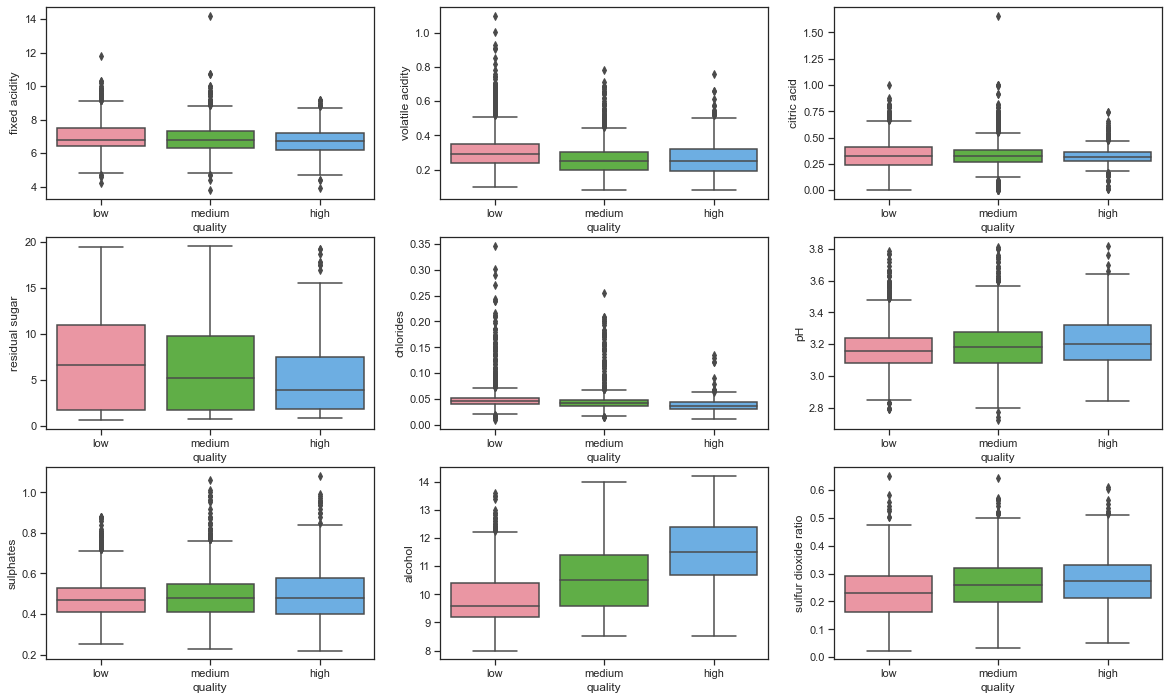

In [53]:
fig,axes = plt.subplots(3,3, figsize=(20,12))
order=['low','medium','high']
sns.boxplot(x='quality', y='fixed acidity', data=whitenodens, ax=axes[0][0],order=order)
sns.boxplot(x='quality', y='volatile acidity', data=whitenodens, ax=axes[0][1], order=order)
sns.boxplot(x='quality', y='citric acid', data=whitenodens, ax=axes[0][2],order=order)
sns.boxplot(x='quality', y='residual sugar', data=whitenodens, ax=axes[1][0],order=order)
sns.boxplot(x='quality', y='chlorides', data=whitenodens, ax=axes[1][1],order=order)
sns.boxplot(x='quality', y='pH', data=whitenodens, ax=axes[1][2],order=order)
sns.boxplot(x='quality', y='sulphates', data=whitenodens, ax=axes[2][0],order=order)
sns.boxplot(x='quality', y='alcohol', data=whitenodens, ax=axes[2][1],order=order)
sns.boxplot(x='quality', y='sulfur dioxide ratio', data=whitenodens, ax=axes[2][2],order=order)

<AxesSubplot:xlabel='quality', ylabel='m_so2'>

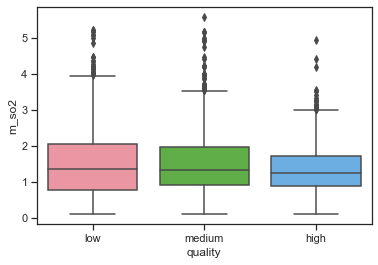

In [54]:
fig,axes = plt.subplots(1,1, figsize=(6,4))
order=['low','medium','high']
sns.boxplot(x='quality', y='m_so2', data=whitenodens,order=order)


Quality type of white wines seems to be strongly affected by 
- alcohol
- residual sugar

In particular, high quality wines tend to contain less residual sugar and more alcohol.

Quality type of white wines seems to be slightly affected by 
- pH
- sulfur dioxide ratio

In particular, high quality wines tend to have a higher pH (less acid) and a higher sulfur dioxide ratio.  

Molecular $SO_2$ seems to be spread equally among low, medium and high qualities.

# RED DATASET

In [55]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      density    pH  sulphates  alcohol quality     m_so2  \
4898   0.9978  3.51       0.56      9.4     low  0.215185   
4899   0.9968  3.20       0.68      9.8     low  0.978585   
4900   0.9970  3.26       0.65      9.8     low  0.513983   
4901   0.9980  3.16       0.58      9.8  medium  0.726893   
4902   0.9978  3.51       0.56      9.4     low  0.215185   

      sulfur dioxide ratio  
4898              0.323529  
4899              0.373134  
4900              0.277778  
4901              0.283333  
4902              0.323529

We check correlation on the red dataset. We see that fixed acidity is positively correlated with density (+0.67) and citric acid (+0.67) and negatively correlated with pH (-0.68), but the values are not so high to warm us.

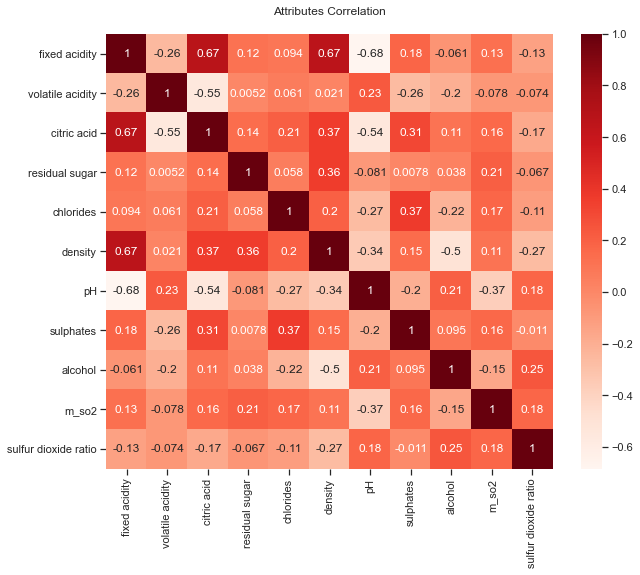

In [56]:
# Correlation matrix
correlations = red.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

# Correlation is okay in red wine

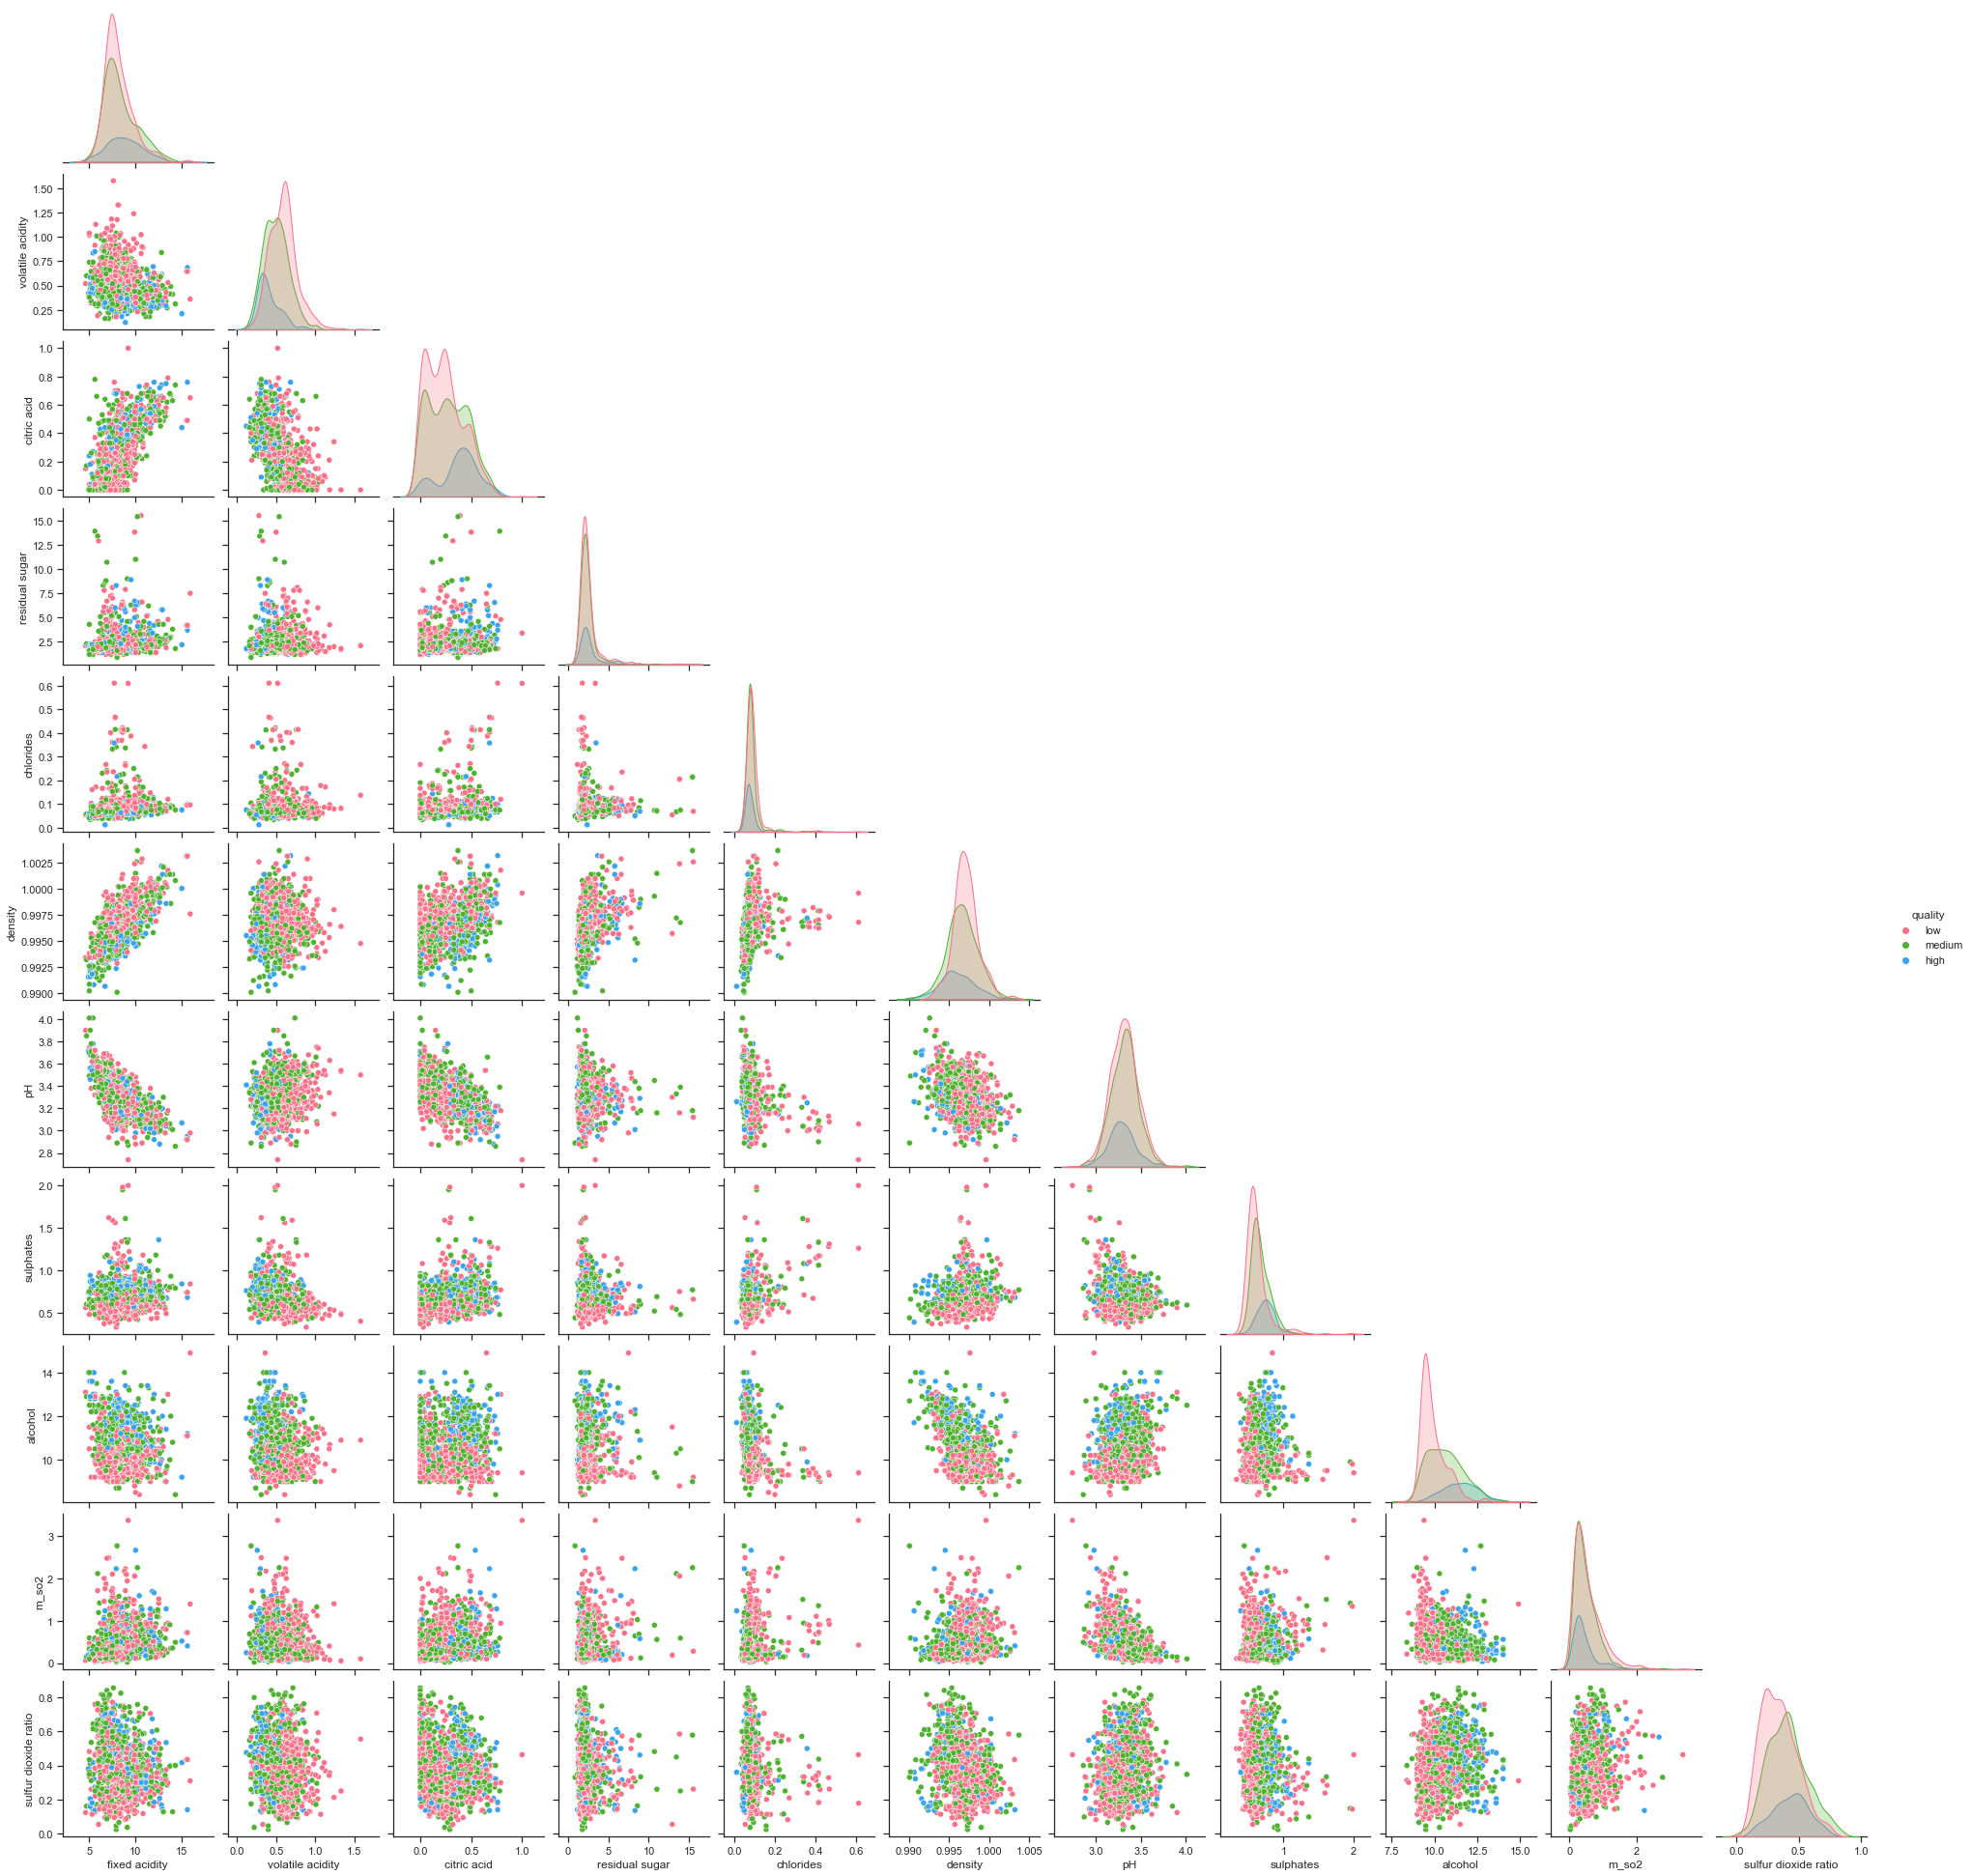

In [57]:
sns.pairplot(red, hue='quality', palette='husl', hue_order=['low', 'medium', 'high'], corner=True)

In [58]:
red_attributes = red.columns

ls_r = round(red[red['quality'] == 'low'][red_attributes].describe(),2)
ms_r = round(red[red['quality'] == 'medium'][red_attributes].describe(),2)
hs_r = round(red[red['quality'] == 'high'][red_attributes].describe(),2)
pd.concat([ls_r, ms_r, hs_r], axis=0, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine']).T


Low Quality Wine                                       \
                                count  mean   std   min   25%   50%    75%   
fixed acidity                   744.0  8.14  1.57  4.60  7.10  7.80   8.90   
volatile acidity                744.0  0.59  0.18  0.18  0.46  0.59   0.68   
citric acid                     744.0  0.24  0.18  0.00  0.08  0.22   0.36   
residual sugar                  744.0  2.54  1.39  1.20  1.90  2.20   2.60   
chlorides                       744.0  0.09  0.06  0.04  0.07  0.08   0.09   
density                         744.0  1.00  0.00  0.99  1.00  1.00   1.00   
pH                              744.0  3.31  0.15  2.74  3.20  3.31   3.40   
sulphates                       744.0  0.62  0.18  0.33  0.52  0.58   0.65   
alcohol                         744.0  9.93  0.76  8.40  9.40  9.70  10.30   
m_so2                           744.0  0.54  0.42  0.05  0.23  0.41   0.72   
sulfur dioxide ratio            744.0  0.34  0.14  0.05  0.23  0.33   0.44   

                            Medium Quality Wine         ...                \
                        max               count   mean  ...    75%    max   
fixed acidity         15.90               638.0   8.35  ...   9.40  14.30   
volatile acidity       1.58               638.0   0.50  ...   0.60   1.04   
citric acid            1.00               638.0   0.27  ...   0.43   0.78   
residual sugar        15.50               638.0   2.48  ...   2.50  15.40   
chlorides              0.61               638.0   0.08  ...   0.09   0.42   
density                1.00               638.0   1.00  ...   1.00   1.00   
pH                     3.90               638.0   3.32  ...   3.41   4.01   
sulphates              2.00               638.0   0.68  ...   0.75   1.95   
alcohol               14.90               638.0  10.63  ...  11.30  14.00   
m_so2                  3.36               638.0   0.48  ...   0.63   2.76   
sulfur dioxide ratio   0.78               638.0   0.41  ...   0.50   0.86   

                     High Quality Wine                                   \
                                 count   mean   std   min    25%    50%   
fixed acidity                    216.0   8.85  2.00  4.90   7.40   8.75   
volatile acidity                 216.0   0.41  0.15  0.12   0.31   0.37   
citric acid                      216.0   0.38  0.19  0.00   0.30   0.40   
residual sugar                   216.0   2.68  1.31  1.20   2.00   2.30   
chlorides                        216.0   0.08  0.03  0.01   0.06   0.07   
density                          216.0   1.00  0.00  0.99   0.99   1.00   
pH                               216.0   3.29  0.15  2.88   3.20   3.28   
sulphates                        216.0   0.74  0.13  0.39   0.65   0.74   
alcohol                          216.0  11.51  1.00  9.20  10.80  11.60   
m_so2                            216.0   0.45  0.38  0.04   0.22   0.32   
sulfur dioxide ratio             216.0   0.44  0.14  0.13   0.33   0.44   

                                    
                        75%    max  
fixed acidity         10.12  15.60  
volatile acidity       0.49   0.92  
citric acid            0.49   0.76  
residual sugar         2.70   8.90  
chlorides              0.09   0.36  
density                1.00   1.00  
pH                     3.38   3.78  
sulphates              0.82   1.36  
alcohol               12.20  14.00  
m_so2                  0.55   2.66  
sulfur dioxide ratio   0.54   0.76  

[11 rows x 24 columns]

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

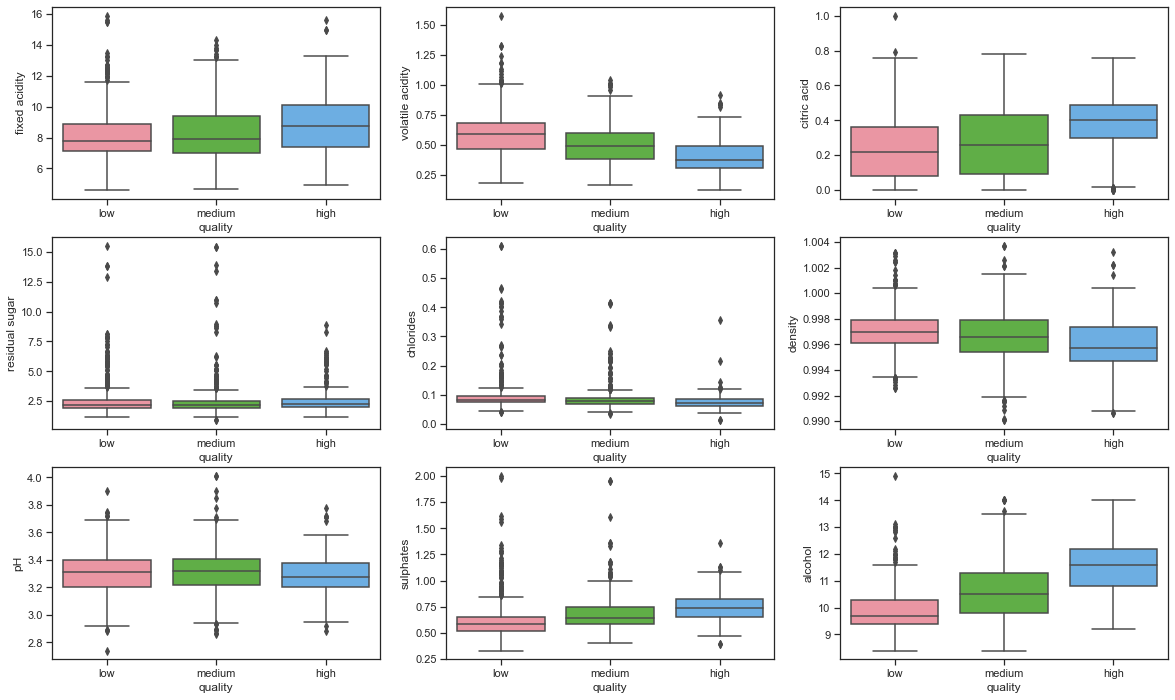

In [59]:
fig,axes = plt.subplots(3,3, figsize=(20,12))
order=['low','medium','high']
sns.boxplot(x='quality', y='fixed acidity', data=red, ax=axes[0][0],order=order)
sns.boxplot(x='quality', y='volatile acidity', data=red, ax=axes[0][1], order=order)
sns.boxplot(x='quality', y='citric acid', data=red, ax=axes[0][2],order=order)
sns.boxplot(x='quality', y='residual sugar', data=red, ax=axes[1][0],order=order)
sns.boxplot(x='quality', y='chlorides', data=red, ax=axes[1][1],order=order)
sns.boxplot(x='quality', y='density', data=red, ax=axes[1][2],order=order)
sns.boxplot(x='quality', y='pH', data=red, ax=axes[2][0],order=order)
sns.boxplot(x='quality', y='sulphates', data=red, ax=axes[2][1],order=order)
sns.boxplot(x='quality', y='alcohol', data=red, ax=axes[2][2],order=order)

<AxesSubplot:xlabel='quality', ylabel='sulfur dioxide ratio'>

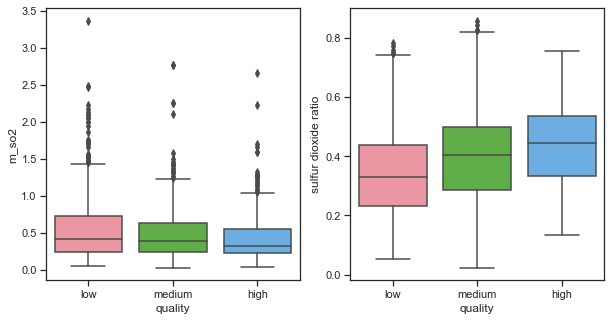

In [60]:
fig,axes = plt.subplots(1,2, figsize=(10,5))
order=['low','medium','high']
sns.boxplot(x='quality', y='m_so2', data=red, ax=axes[0],order=order)
sns.boxplot(x='quality', y='sulfur dioxide ratio', data=red, ax=axes[1],order=order)

Quality type of red wines seems to be strongly affected by 
- alcohol
- volatile acidity
- sulfur dioxide ratio 
- citric acid

In particular, high quality red wines tend to contain more alcohol and citric acid. Volatile acidity is lower for high quality wines and sulfur dioxide ratio is higher.

Quality type of red wines seems also to be slightly affected by 
- density (high quality wines are less dense)
- sulphates (high quality wines contain more sulphates)

- molecular $SO_2$ is on average higher in low and medium quality wines with respect to high quality wines  


# Principal component analysis

We perform PCA in order to understand which variables are the most informative in our dataset. By analysing the loadings of the first principal component we can see which variables explain the most the total variability of our data.

##### White

In [61]:
white_features_pca=whitenodens.copy()
white_features_pca.drop(labels=['quality'], axis=1, inplace=True)
white_features_pca.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

     pH  sulphates  alcohol     m_so2  sulfur dioxide ratio  
1  3.30       0.49      9.5  0.438831              0.106061  
2  3.26       0.44     10.1  1.027967              0.309278  
3  3.19       0.40      9.9  1.880878              0.252688  
4  3.19       0.40      9.9  1.880878              0.252688  
5  3.26       0.44     10.1  1.027967              0.309278

In [62]:
x = white_features_pca.values

Before going ahead and developing a PCA, we need to standardise the data in order to have them all on the same scale and to be able to better interpret their variability.

In [63]:
x = StandardScaler().fit_transform(x) # normalizing the features

In [64]:
np.mean(x),np.std(x) # ok mean 0 and sd 1

(2.4351381838135883e-16, 0.9999999999999999)

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

In [66]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels= ['PC'+str(i) for i in range(1, len(per_var)+1)]
per_var

array([23.9, 14.6, 13.3, 11.8,  9.3,  9.1,  7.3,  5.2,  4. ,  1.5])

In [67]:
#eplained variance percentage by each principal component
pca.explained_variance_ratio_ 

array([0.23931464, 0.14606442, 0.13298154, 0.11831009, 0.09270071,
       0.09064549, 0.07285685, 0.05173578, 0.0404855 , 0.01490498])

<AxesSubplot:>

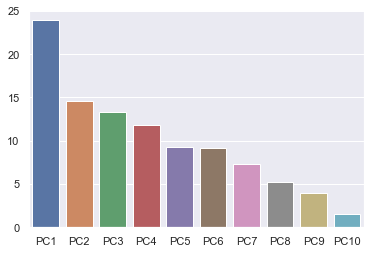

In [68]:
import seaborn as sns
sns.set()
sns.barplot(x=labels,y=per_var)

Text(0.5, 0, 'Principal Components')

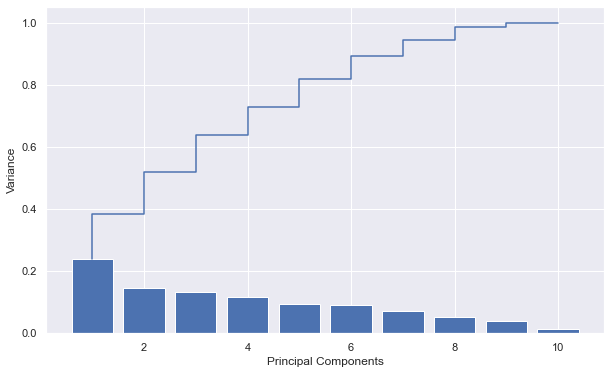

In [69]:
plt.figure(figsize=(10,6))
plt.step(range(1, len(per_var)+1),np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(1, len(per_var)+1), pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Principal Components")

This plot shows that the first PC explains almost 25% of the total variability of our data. The first 4 PCs together explain about 60% of the variability of our data.

In [70]:
white_load = whitenodens.drop(['quality'], axis = 1)
white_load.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'pH', 'sulphates', 'alcohol', 'm_so2',
       'sulfur dioxide ratio'],
      dtype='object')

In [71]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
X = pca.fit_transform(x)

In [72]:
##Loadings for each principal component that we keep 
loading_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'], 
                              index = white_load.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.291934  0.290922 -0.532044  0.078614  0.070921   
volatile acidity     -0.070947  0.310424  0.096109 -0.554741  0.531308   
citric acid           0.262317  0.068293 -0.311364  0.479023 -0.058706   
residual sugar        0.384296  0.104049  0.335556 -0.111391  0.099385   
chlorides             0.219479  0.296136  0.349670  0.122956 -0.203202   
pH                   -0.424930 -0.086192  0.381283  0.283548 -0.089255   
sulphates            -0.050440  0.042909  0.143171  0.561987  0.759302   
alcohol              -0.364813 -0.302852 -0.440263 -0.129111  0.192613   
m_so2                 0.533621 -0.342068  0.040090 -0.126507  0.175081   
sulfur dioxide ratio  0.210064 -0.705560  0.120688 -0.013817  0.076211   

                           PC6  
fixed acidity        -0.090125  
volatile acidity      0.279115  
citric acid           0.176200  
residual sugar       -0.532576  
chlorides             0.711027  
pH                   -0.064654  
sulphates            -0.015725  
alcohol               0.204869  
m_so2                 0.102430  
sulfur dioxide ratio  0.191932

<AxesSubplot:title={'center':'Loadings in PC1'}>

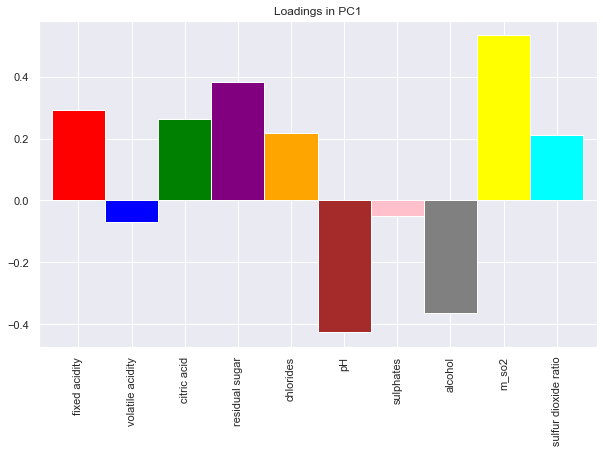

In [73]:
colors = ["red","blue","green","purple","orange","brown","pink","gray","yellow","cyan","black"]
plt.figure(figsize=(10,6))
plt.title("Loadings in PC1")
loading_matrix['PC1'].plot.bar(width = 1,color = colors)

We can interpret this plot as follows:  
- There are two main groups of significant covariates. The first is composed by Fixed acidity, Residual sugar and m_so2, while the second is composed by pH and Alcohol. There is a clear contrast between them: high scores in PC1 tend to have high values for the first group and low values for the second group (or viceversa). 

##### Red

In [74]:
red_features_pca=red.copy()
red_features_pca.drop(labels=['quality'], axis=1, inplace=True)
red_features_pca.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      density    pH  sulphates  alcohol     m_so2  sulfur dioxide ratio  
4898   0.9978  3.51       0.56      9.4  0.215185              0.323529  
4899   0.9968  3.20       0.68      9.8  0.978585              0.373134  
4900   0.9970  3.26       0.65      9.8  0.513983              0.277778  
4901   0.9980  3.16       0.58      9.8  0.726893              0.283333  
4902   0.9978  3.51       0.56      9.4  0.215185              0.323529

In [75]:
x = red_features_pca.values
x = StandardScaler().fit_transform(x)
np.mean(x),np.std(x) 

(-6.913825777927383e-15, 1.0)

In [76]:
pca = PCA()
principalComponents = pca.fit_transform(x)
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels= ['PC'+str(i) for i in range(1, len(per_var)+1)]
per_var

array([29.6, 16. , 11.7, 10.5,  9. ,  6.6,  6. ,  5. ,  3.1,  1.8,  0.5])

In [77]:
pca.explained_variance_ratio_

array([0.29613392, 0.16040493, 0.11711347, 0.10500929, 0.09041064,
       0.06625026, 0.06039918, 0.04973837, 0.03083618, 0.01833747,
       0.0053663 ])

Text(0.5, 0, 'Principal Components')

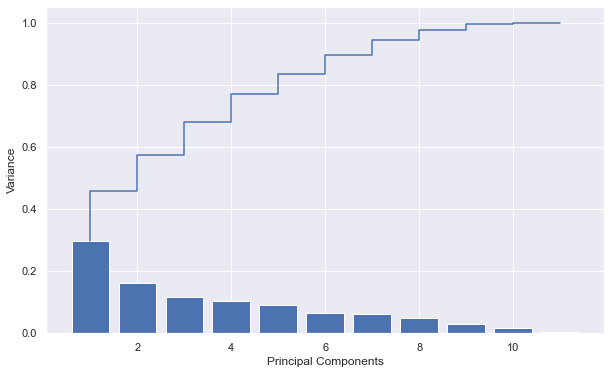

In [78]:
plt.figure(figsize=(10,6))
plt.step(range(1, len(per_var)+1),np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(1, len(per_var)+1), pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Principal Components")

The first PC explains almost 30% of the total variability of our data.

In [79]:
red_load = red.drop(['quality'], axis = 1)
red_load.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'm_so2',
       'sulfur dioxide ratio'],
      dtype='object')

In [80]:
#Loadings for each principal component that we keep 
from sklearn import decomposition
pca = decomposition.PCA(n_components=7)
X = pca.fit_transform(x)
loading_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'], 
                              index = red_load.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.462078  0.041852 -0.278110  0.082773 -0.152909   
volatile acidity     -0.211896 -0.512419  0.134550  0.044465  0.057836   
citric acid           0.438324  0.289848 -0.172014 -0.058498  0.044891   
residual sugar        0.155376 -0.118109  0.026213  0.588434  0.658929   
chlorides             0.217339 -0.148699  0.519257 -0.387493  0.218375   
density               0.389885 -0.361857 -0.158809  0.134242  0.128601   
pH                   -0.436223 -0.009917 -0.033471 -0.015590  0.343183   
sulphates             0.232762  0.234441  0.386897 -0.368600  0.329431   
alcohol              -0.137363  0.570605 -0.106358  0.087879  0.335068   
m_so2                 0.201378  0.020851  0.545087  0.425559 -0.270599   
sulfur dioxide ratio -0.148920  0.321832  0.346679  0.385216 -0.247087   

                           PC6       PC7  
fixed acidity        -0.316777  0.274727  
volatile acidity     -0.187150  0.611411  
citric acid           0.072171  0.030358  
residual sugar        0.155096 -0.040539  
chlorides            -0.026448  0.244651  
density              -0.413526 -0.207958  
pH                   -0.233693 -0.352315  
sulphates            -0.222341 -0.206465  
alcohol               0.022829  0.524146  
m_so2                 0.366896 -0.058554  
sulfur dioxide ratio -0.651520 -0.011208

<AxesSubplot:title={'center':'Loadings in PC1'}>

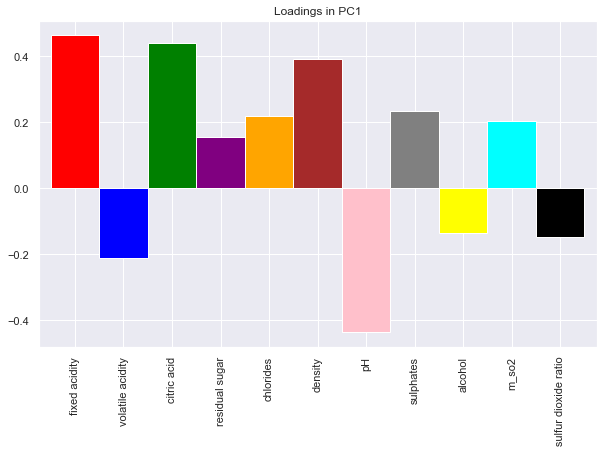

In [81]:
colors = ["red","blue","green","purple","orange","brown","pink","gray","yellow","cyan","black"]
plt.figure(figsize=(10,6))
plt.title("Loadings in PC1")
loading_matrix['PC1'].plot.bar(width = 1,color = colors)

We can interpret this plot as follows:  
- There are two main groups of significant covariates. The first is composed by Fixed acidity, Citric acid and density, while the second is composed by pH. There is a clear contrast between them: high scores in PC1 tend to have high values for the first group and low values for the second group (or viceversa). 

# Target encoding & Train/Test splitting

In [82]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      density    pH  sulphates  alcohol quality     m_so2  \
4898   0.9978  3.51       0.56      9.4     low  0.215185   
4899   0.9968  3.20       0.68      9.8     low  0.978585   
4900   0.9970  3.26       0.65      9.8     low  0.513983   
4901   0.9980  3.16       0.58      9.8  medium  0.726893   
4902   0.9978  3.51       0.56      9.4     low  0.215185   

      sulfur dioxide ratio  
4898              0.323529  
4899              0.373134  
4900              0.277778  
4901              0.283333  
4902              0.323529

In [83]:
red['quality'] = red.quality.apply(lambda q: 0 if q == "low" else 1 if q == "medium" else 2)

In [84]:
red['quality'].head()

4898    0
4899    0
4900    0
4901    1
4902    0
Name: quality, dtype: int64

In [85]:
white['quality'] = white.quality.apply(lambda q: 0 if q == "low" else 1 if q == "medium" else 2)

In [86]:
white['quality'].head()

1    1
2    1
3    1
4    1
5    1
Name: quality, dtype: int64

# Multinomial Logistic CV

Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems. Changing logistic regression from binomial to multinomial probability requires a change to the loss function used to train the model (e.g. log loss to cross-entropy loss), and a change to the output from a single probability value to one probability for each class label.

In this section, we will develop and evaluate a multinomial logistic regression model using the scikit-learn Python machine learning library.The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as “lbfgs“. The “lbfgs“ tries to find the parameter weights that minimize the cost function


We will perform three models of the multinomial logistic: one with l2 penalty, one with l1 penalty and one with no penalty. The reason is that we would like to know which are the coefficients that the penalty force to be zero (l1 penalty) or very close to zero (l2 penalty), so as to understand which covariates have a singificant effect on the wine quality. 


### Red

#### Ridge 

##### Loading libraries 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import classification_report
import numpy as np
from numpy import mean,std
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [88]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4898            7.4              0.70         0.00             1.9      0.076   
4899            7.8              0.88         0.00             2.6      0.098   
4900            7.8              0.76         0.04             2.3      0.092   
4901           11.2              0.28         0.56             1.9      0.075   
4902            7.4              0.70         0.00             1.9      0.076   

      density    pH  sulphates  alcohol  quality     m_so2  \
4898   0.9978  3.51       0.56      9.4        0  0.215185   
4899   0.9968  3.20       0.68      9.8        0  0.978585   
4900   0.9970  3.26       0.65      9.8        0  0.513983   
4901   0.9980  3.16       0.58      9.8        1  0.726893   
4902   0.9978  3.51       0.56      9.4        0  0.215185   

      sulfur dioxide ratio  
4898              0.323529  
4899              0.373134  
4900              0.277778  
4901              0.283333  
4902              0.323529

In [239]:
X_cov_red=red.drop(['quality'], axis=1)

In [240]:
Y_target_red=red['quality']

##### Covariates scaling
We scale the covariates using the 'Standard Scaler' function since variables in our dataset have different units of measurement and this can affect the estimation of the coefficients of our model. 

In [241]:
scaler=StandardScaler()
scaler.fit(X_cov_red)
X_cov_red=scaler.transform(X_cov_red)

In [242]:
X_cov_red=pd.DataFrame(X_cov_red)

In [243]:
#split train and test 
X_cov_red_train,X_cov_red_test,Y_red_train, Y_red_test = train_test_split(X_cov_red,Y_target_red, test_size =0.20, stratify = Y_target_red,random_state=42)

##### Model definition and prediction
* we decide to use the default solver 'lbfgs'
* the penalty used by the model is by default the l2 penalty. 
* we have decided to compute a Gridsearch to tune the penalty term. This term imposes pressure on the model to seek smaller model weights. 
* we have decided to use the f1 score as metric, since our classes are not balanced. In particular, we use the f1 micro average since it aggregates the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more observations of one class than of other classes). 

In [244]:
mlr_model_red=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='l2')
param_grid = {"C": np.arange(0,1,0.01)}
#use gridsearch to test all values for n_neighbors
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mlr_gscv = GridSearchCV(mlr_model_red, param_grid, cv=cv,scoring='f1_micro',return_train_score=True)
#fit model to data
mlr_fit=mlr_gscv.fit(X_cov_red_train, Y_red_train)

##### Train and test performance

Since the train scores and test scores follow the same trend we can state that we have no overfitting problem. 

In [245]:
train_scores_mean = mlr_gscv.cv_results_["mean_train_score"]
test_scores_mean= mlr_gscv.cv_results_["mean_test_score"]
Cs=np.arange(0,1,0.01)

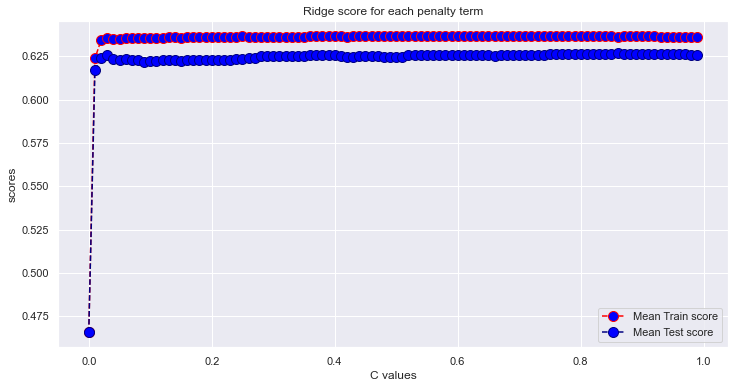

In [246]:
plt.figure(figsize=(12,6))
plt.plot(Cs, train_scores_mean,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Train score')
plt.plot(Cs, test_scores_mean,color='navy',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Test score')
plt.title('Ridge score for each penalty term')
plt.xlabel('C values')
plt.ylabel('scores')
plt.legend(loc='best')
plt.show()

In [247]:
#check top performing C value
mlr_gscv.best_params_

{'C': 0.86}

C is the hyperparameter ruling the amount of regularisation in the model. The larger C the less penalty is applied. In our case the value of C that maximize the f1 score is 0.86.

In [248]:
#prediction
pred_ridge_red= mlr_gscv.predict(X_cov_red_test)

##### Confusion matrix

From the confusion matrix we can state the following:
* the number of misslassified observations for the low class are 29
* the number of misslassified observations for the medium class are 56
* the number of misslassified observations for the high class are 27

Text(30.5, 0.5, 'True label')

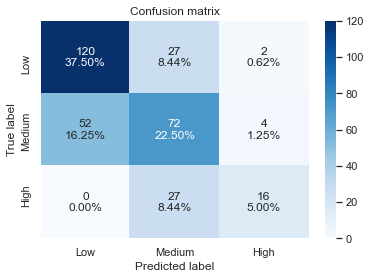

In [249]:
cm = confusion_matrix(Y_red_test,pred_ridge_red)


group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Classification report

The report shows an overview of all the metrics that result from our classification. We do not use the accuracy since our classes are not balanced; we do not look at neither the recall nor the precision because we are not interested in predicting well a specific class. Therefore we use the F1 score, since it gives a general idea of the performance of the model (with unbalanced classes); in particular, we will look at the micro average of the f1 scores. 

In [250]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_red_test,pred_ridge_red, target_names=target_names))

              precision    recall  f1-score   support

         low       0.70      0.81      0.75       149
      medium       0.57      0.56      0.57       128
        high       0.73      0.37      0.49        43

    accuracy                           0.65       320
   macro avg       0.67      0.58      0.60       320
weighted avg       0.65      0.65      0.64       320



##### F1 score

In [251]:
print("F1_score %s" %f1_score(Y_red_test,pred_ridge_red,average='micro'))

F1_score 0.65


##### Model coefficients 

In [252]:
col=red.columns
col=col.drop(['quality'])

In [253]:
ridge_coeff=pd.DataFrame(mlr_fit.best_estimator_.coef_)

In [254]:
ridge_coeff.columns=col
ridge_coeff['class']=['low','medium','high']
ridge_coeff.set_index('class',inplace=True)

In [255]:
display(ridge_coeff)

fixed acidity  volatile acidity  citric acid  residual sugar  \
class                                                                  
low         -0.143311          0.458320     0.110331       -0.086576   
medium      -0.039629         -0.069689    -0.220275       -0.104466   
high         0.182941         -0.388631     0.109944        0.191042   

        chlorides   density        pH  sulphates   alcohol     m_so2  \
class                                                                  
low      0.161436  0.029244  0.222755  -0.415918 -0.753314  0.302450   
medium   0.089505  0.135753 -0.058959  -0.026456  0.112266  0.021572   
high    -0.250941 -0.164997 -0.163795   0.442374  0.641048 -0.324022   

        sulfur dioxide ratio  
class                         
low                -0.375550  
medium              0.003591  
high                0.371960

The probability to belong to a class is computed by multiplying each coefficient by the corresponding covariate for each observation. This procedure is done three times: one for each class. We can interpret our result in the following way, without citing cases with very low probabilities:

* **fixed acidity**: for this covariate the coefficient for low class is negative, while for high class is positive. We can interpret this difference as follows: the probability of belonging to high class increases as the fixed acidity value increases; on the contrary, the probability of belonging to the low class decreases as the values of fixed acidity increases. The coefficient related to the medium class is close to zero, thus the effect of fixed acidity in computing the probability of belonging to the medium class is not significant. 
* **volatile acidity**: the probability of belonging to high class decreases as volatile acidity values increase and that of belonging to low class increases as volatile acidity values increase. 
* **citric acid**: citric acid affects negatively the probability of belonging to medium class and positively the one of belonging to low  and high classes. Therefore, this variable is important only in determining the probability of being in the medium class. 
* **residual sugar**: residual sugar affects negatively the probability of being in medium class, and positively the one of being in high class. 
* **chlorides**: as cholorides increase, the probability of belonging to the low class increases and the probability of belonging to the high class decrease. 
* **density**: density affects positively the probability of belonging to the medium class and negatively the probability of belonging to the high class.
* **pH**: pH slightly affects both low and high probability: positively the first and negatively the latter.
* **sulphates**: sulphates has an effect on both high and low probability: positively the first and negatively the latter.
* **alcohol**: alcohol affects (strongly) positively the probability of being in high class and (strongly) negatively the probability of being in low class; it affects positively also the medium class.
* **m_so2**: molecular So2 has a positive effect on the probability of being in low class and negative on belonging in high class. 
* **sulfur dioxide ratio**: the probability of belonging to high class increases as sulfur dioxide ratio increases, while the probability of belonging to low class decreases. 

We can notice that a lots of coefficients are very close to zero and this is the effect of the l2 penalty (ridge). 

Now we are going to use our model (and coefficients) to predict the probability of belonging to each class.

In [256]:
test_probs_tot_red = mlr_fit.predict_proba(X_cov_red_test)
Probabilities = pd.DataFrame(test_probs_tot_red)
Probabilities['pred_label'] = pred_ridge_red
Probabilities.head(5)

0         1         2  pred_label
0  0.106524  0.540736  0.352740           1
1  0.579734  0.391159  0.029107           0
2  0.868720  0.129312  0.001968           0
3  0.709716  0.277929  0.012355           0
4  0.585767  0.385251  0.028982           0

#### Lasso

###### Model definition and prediction 
* in order to fit a lasso model we change the 'penalty' parameter to l1 penalty

In [257]:
mlr_model_red=LogisticRegression(multi_class='multinomial',solver='saga',penalty='l1')
param_grid = {"C": np.arange(0,1,0.01)}
#use gridsearch to test all values for C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mlr_gscv = GridSearchCV(mlr_model_red, param_grid, cv=cv,scoring='f1_micro',return_train_score=True)
#fit model to data
mlr_fit=mlr_gscv.fit(X_cov_red_train, Y_red_train)

##### Train set and test set performance

In [258]:
train_scores_mean = mlr_gscv.cv_results_["mean_train_score"]
test_scores_mean= mlr_gscv.cv_results_["mean_test_score"]
Cs=np.arange(0,1,0.01)

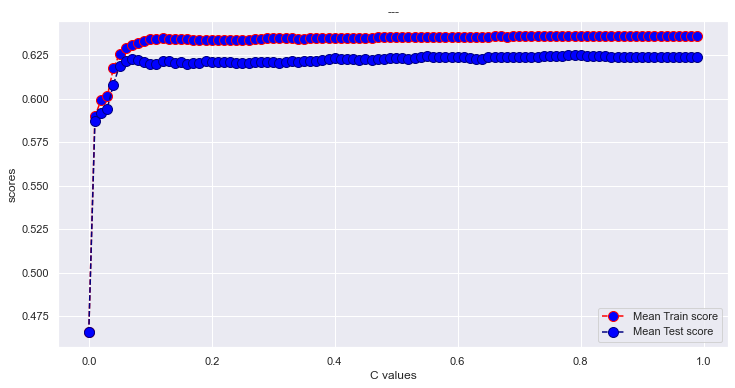

In [259]:
plt.figure(figsize=(12,6))
plt.plot(Cs, train_scores_mean,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Train score')
plt.plot(Cs, test_scores_mean,color='navy',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Test score')
plt.title('---')
plt.xlabel('C values')
plt.ylabel('scores')
plt.legend(loc='best')
plt.show()

In [260]:
pred_lasso_red= mlr_gscv.predict(X_cov_red_test)

###### Confusion matrix

As for the ridge the medium class reports the highest number of missclassifications

Text(30.5, 0.5, 'True label')

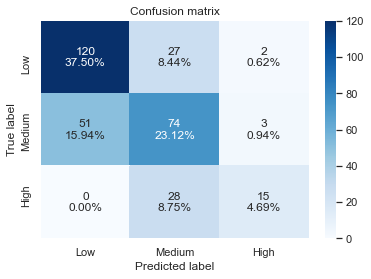

In [261]:
cm = confusion_matrix(Y_red_test,pred_lasso_red)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

The number of misclassified observations of Lasso is similiar to the number of misclassified observations of Ridge.

###### Classification report


In [262]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_red_test,pred_lasso_red, target_names=target_names))

              precision    recall  f1-score   support

         low       0.70      0.81      0.75       149
      medium       0.57      0.58      0.58       128
        high       0.75      0.35      0.48        43

    accuracy                           0.65       320
   macro avg       0.68      0.58      0.60       320
weighted avg       0.66      0.65      0.64       320



In [263]:
print("F1_score %s" %f1_score(Y_red_test,pred_lasso_red,average='micro'))

F1_score 0.653125


##### Lasso coefficients

In [264]:
lasso_coeff=pd.DataFrame(mlr_fit.best_estimator_.coef_)

In [265]:
lasso_coeff.columns=col
lasso_coeff['class']=['low','medium','high']
lasso_coeff.set_index('class',inplace=True)

In [266]:
lasso_coeff 

fixed acidity  volatile acidity  citric acid  residual sugar  \
class                                                                  
low         -0.100941          0.520153     0.000000        0.000000   
medium       0.000000          0.000000    -0.317147       -0.014932   
high         0.161907         -0.330347     0.000000        0.242665   

        chlorides   density        pH  sulphates   alcohol     m_so2  \
class                                                                  
low      0.067485  0.000000  0.271327  -0.382310 -0.859260  0.273255   
medium   0.000000  0.100579  0.000000   0.000000  0.000000  0.000000   
high    -0.317855 -0.120177 -0.116933   0.445358  0.565514 -0.320887   

        sulfur dioxide ratio  
class                         
low                -0.374594  
medium              0.000000  
high                0.352191

- As for the probability of belonging to low class wines, we can state that the citric acid, the density and residual sugar are not significant anymore.  
- Regarding the medium class, the significant covariates are citric acid and density (residual sugar has a very low probability).  
- Finally for the high class, all variable result significant except for citric acid. 

In [117]:
test_probs_tot_red = mlr_fit.predict_proba(X_cov_red_test)
Probabilities = pd.DataFrame(test_probs_tot_red)
Probabilities['pred_label'] = pred_lasso_red
Probabilities.head(5)

0         1         2  pred_label
0  0.103228  0.522219  0.374553           1
1  0.577601  0.391882  0.030517           0
2  0.868036  0.129941  0.002023           0
3  0.710285  0.276789  0.012926           0
4  0.585478  0.384222  0.030300           0

#### No penalty

We have performed the multinomial logistic regression with no penalty. We have noticed that the f1 score is pretty the same compared to the ridge model: this is probably due to the fact that the optimal penalty term for ridge is high ($\frac{1}{\lambda} = C = +0.86$ ), thus the effect of penalization (${\lambda}$) on the model is low. For this reason ,we won't consider this model for our final goal. 

##### Model definition and prediction

In [118]:
mlr_model_red=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='none')
#use gridsearch to test all values for C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mlr_model_red.fit(X_cov_red_train,Y_red_train)
scores_red=cross_val_score(mlr_model_red,X_cov_red_train,Y_red_train,scoring='f1_micro',cv=cv)


In [119]:
pred_red= mlr_model_red.predict(X_cov_red_test)

##### Confusion matrix

Text(30.5, 0.5, 'True label')

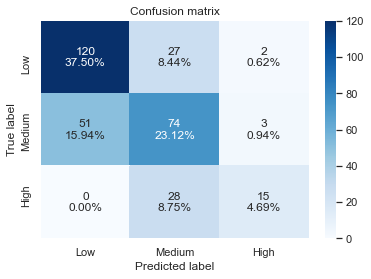

In [120]:
cm = confusion_matrix(Y_red_test,pred_lasso_red)
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Classification report

In [121]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_red_test,pred_red, target_names=target_names))

              precision    recall  f1-score   support

         low       0.69      0.81      0.75       149
      medium       0.57      0.55      0.56       128
        high       0.74      0.40      0.52        43

    accuracy                           0.65       320
   macro avg       0.67      0.59      0.61       320
weighted avg       0.65      0.65      0.64       320



##### F1 score

In [122]:
print("F1_score %s" %f1_score(Y_red_test,pred_red,average='micro'))

F1_score 0.65


##### No-penalty coefficients

In [123]:
nopenalty_coeff=pd.DataFrame(mlr_model_red.coef_)

In [124]:
nopenalty_coeff.columns=col
nopenalty_coeff['class']=['low','medium','high']
nopenalty_coeff.set_index('class',inplace=True)

In [125]:
display(nopenalty_coeff)

fixed acidity  volatile acidity  citric acid  residual sugar  \
class                                                                  
low         -0.137981          0.464837     0.116412       -0.086353   
medium      -0.041922         -0.068606    -0.220210       -0.106321   
high         0.179903         -0.396231     0.103798        0.192674   

        chlorides   density        pH  sulphates   alcohol     m_so2  \
class                                                                  
low      0.164193  0.020751  0.231299  -0.419641 -0.764384  0.307889   
medium   0.091769  0.137634 -0.059156  -0.028492  0.112721  0.024030   
high    -0.255962 -0.158385 -0.172144   0.448134  0.651663 -0.331919   

        sulfur dioxide ratio  
class                         
low                -0.380296  
medium              0.001020  
high                0.379276

In [126]:
test_probs_tot_red = mlr_model_red.predict_proba(X_cov_red_test)
Probabilities = pd.DataFrame(test_probs_tot_red)
Probabilities['pred_label'] = pred_red
Probabilities.loc[0,:]

0             0.104932
1             0.543208
2             0.351860
pred_label    1.000000
Name: 0, dtype: float64

### White

Now we are going to perform the same analysis on the white dataset. Note that with the logistic classificator, the collinear covariates negatively influence the estimation of coefficients and therefore the model performance. Hence we train this model without "density" column, which was the most collinear one.

In [127]:
whitenodens.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   

     pH  sulphates  alcohol quality     m_so2  sulfur dioxide ratio  
1  3.30       0.49      9.5  medium  0.438831              0.106061  
2  3.26       0.44     10.1  medium  1.027967              0.309278  
3  3.19       0.40      9.9  medium  1.880878              0.252688  
4  3.19       0.40      9.9  medium  1.880878              0.252688  
5  3.26       0.44     10.1  medium  1.027967              0.309278

In [128]:
X_cov_w=whitenodens.drop(['quality'], axis=1)

In [129]:
Y_target_w=whitenodens['quality']

##### Covariates scaling 

In [130]:
#scale covariates
scaler=StandardScaler()
scaler.fit(X_cov_w)
X_cov_w=scaler.transform(X_cov_w)
X_cov_w=pd.DataFrame(X_cov_w)

In [131]:
#split train and test sets 
X_cov_w_train,X_cov_w_test,Y_w_train, Y_w_test = train_test_split(X_cov_w,Y_target_w, test_size =0.20, stratify = Y_target_w,random_state=42)

#### Ridge 

#### Model definition and prediction

In [132]:
mlr_model_w=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='l2')
param_grid = {"C": np.arange(0,1,0.01)}
#use gridsearch to test all values for n_neighbors
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mlr_gscv = GridSearchCV(mlr_model_w, param_grid, cv=cv,scoring='f1_micro',return_train_score=True)
#fit model to data
mlr_fit=mlr_gscv.fit(X_cov_w_train, Y_w_train)

##### Train and test performance

Also in the case of white we can say that the model do not overfit the data.

In [133]:
train_scores_mean = mlr_gscv.cv_results_["mean_train_score"]
test_scores_mean= mlr_gscv.cv_results_["mean_test_score"]
Cs=np.arange(0,1,0.01)

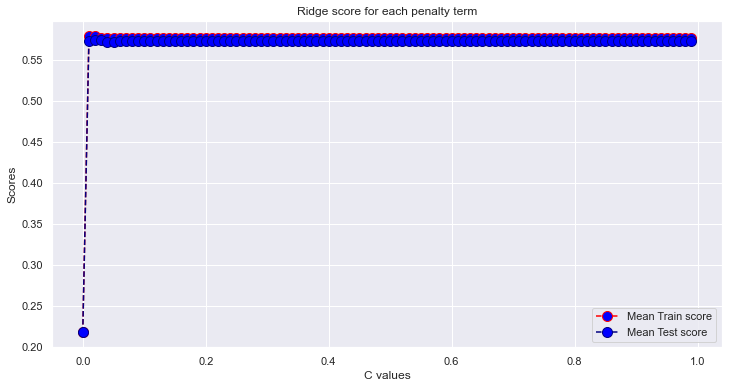

In [134]:
plt.figure(figsize=(12,6))
plt.plot(Cs, train_scores_mean,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Train score')
plt.plot(Cs, test_scores_mean,color='navy',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Test score')
plt.title('Ridge score for each penalty term')
plt.xlabel('C values')
plt.ylabel('Scores')
plt.legend(loc='best')
plt.show()

In [135]:
pred_ridge_w= mlr_gscv.predict(X_cov_w_test)

##### Confusion matrix

* low class has 29 missclassified observations
* medium class has 54 missclassified observations
* low class has 28 missclassified observations 

Text(30.5, 0.5, 'True label')

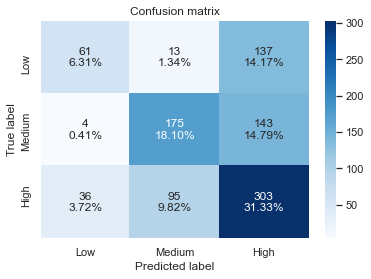

In [136]:
cm = confusion_matrix(Y_w_test,pred_ridge_w)
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')


##### Classification report

f1 score is lower for the white classification.

In [137]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_w_test,pred_ridge_w, target_names=target_names))

              precision    recall  f1-score   support

         low       0.60      0.29      0.39       211
      medium       0.62      0.54      0.58       322
        high       0.52      0.70      0.60       434

    accuracy                           0.56       967
   macro avg       0.58      0.51      0.52       967
weighted avg       0.57      0.56      0.55       967



In [138]:
print("F1_score %s" %f1_score(Y_w_test,pred_ridge_w,average='micro'))

F1_score 0.5573940020682523


##### Ridge coefficients

In [139]:
ridge_coeff_w=pd.DataFrame(mlr_fit.best_estimator_.coef_)

In [141]:
col=X_cov_w_test.columns
ridge_coeff_w.columns = col
ridge_coeff_w['class']=['low','medium','high']
ridge_coeff_w.set_index('class',inplace=True)

In [142]:
display(ridge_coeff_w)

0         1         2         3        4         5         6  \
class                                                                         
low     0.009317 -0.255833 -0.036473  0.144763 -0.22498  0.092085  0.112119   
medium  0.058780  0.412492  0.012072 -0.176800  0.11151 -0.036310 -0.132059   
high   -0.068097 -0.156659  0.024401  0.032037  0.11347 -0.055775  0.019940   

               7         8         9  
class                                 
low     0.731804 -0.004166  0.189736  
medium -0.823014 -0.001120 -0.233288  
high    0.091210  0.005287  0.043552

We can interpret the coefficients in the following way:

* **fixed acidity**: fixed acidity has very low coefficients meaning that is not strongly significant in modelling the probability of belonging to one of the classes. 
* **volatile acidity**: the probability of belonging to both low and high classes decreases, while the probability of belonging to the medium class increases as volatile acidity increases. 
* **citric acid**: citric acid seems to be not strongly significant since coefficients are very close to zero.
* **residual sugar**: residual sugar affects negatively the probability of being in medium class and positively of being in low class. 
* **chlorides**: chlorides affects positively the probability of being in low and medium classes, while affects negatively the probability of low class. 
* **pH**: pH negatively seems to be not strongly significant since coefficients are very close to zero.
* **sulphates**: sulphates has an effect on both high and low probability: positively the first and negatively the latter.
* **alcohol**: alcohol strongly affects positively the probability of being in low class and negatively the probability of being in medium class.
* **m_so2**: molecular So2 seems to be not strongly significant since coefficients are very close to zero.
* **sulfur dioxide ratio**: the probability of belonging to low class increases as sulfur dioxide ratio increases, while the probability of belonging to medium class decreases. 

#### Lasso

In [143]:
mlr_model_w=LogisticRegression(multi_class='multinomial',solver='saga',penalty='l1')
param_grid = {"C": np.arange(0,1,0.01)}
#use gridsearch to test all values for C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mlr_gscv = GridSearchCV(mlr_model_w, param_grid, cv=cv,scoring='f1_micro',return_train_score=True)
#fit model to data
mlr_fit=mlr_gscv.fit(X_cov_w_train, Y_w_train)

##### Train and test performance 

In [144]:
train_scores_mean = mlr_gscv.cv_results_["mean_train_score"]
test_scores_mean= mlr_gscv.cv_results_["mean_test_score"]
Cs=np.arange(0,1,0.01)

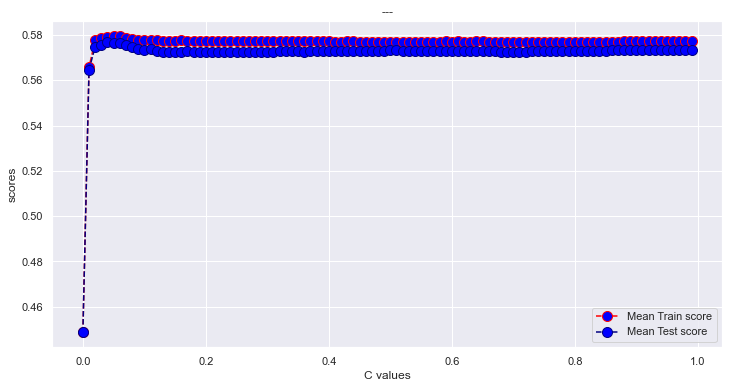

In [145]:
plt.figure(figsize=(12,6))
plt.plot(Cs, train_scores_mean,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Train score')
plt.plot(Cs, test_scores_mean,color='navy',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10,label='Mean Test score')
plt.title('---')
plt.xlabel('C values')
plt.ylabel('scores')
plt.legend(loc='best')
plt.show()

In [146]:
pred_lasso_w= mlr_gscv.predict(X_cov_w_test)

##### Confusion matrix  

Here we notice that the number of misclassified observations is very high.

Text(30.5, 0.5, 'True label')

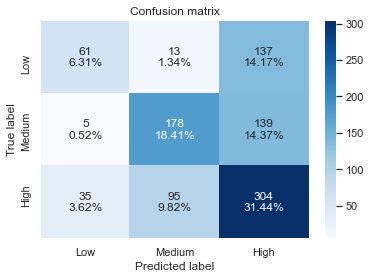

In [147]:
cm = confusion_matrix(Y_w_test,pred_lasso_w)
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Classification report  

In [148]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_w_test,pred_lasso_w, target_names=target_names))

              precision    recall  f1-score   support

         low       0.60      0.29      0.39       211
      medium       0.62      0.55      0.59       322
        high       0.52      0.70      0.60       434

    accuracy                           0.56       967
   macro avg       0.58      0.51      0.53       967
weighted avg       0.57      0.56      0.55       967



In [149]:
print("F1_score %s" %f1_score(Y_w_test,pred_lasso_w, average='micro'))

F1_score 0.56153050672182


##### Lasso coefficients 

In [150]:
lasso_coeff_w=pd.DataFrame(mlr_fit.best_estimator_.coef_)

In [151]:
lasso_coeff_w.columns=col
lasso_coeff_w['class']=['low','medium','high']
lasso_coeff_w.set_index('class',inplace=True)

In [152]:
display(lasso_coeff_w)

0         1    2         3        4         5         6         7  \
0  0.000000 -0.063471  0.0  0.054887 -0.22364  0.093083  0.067488  0.647576   
1  0.056974  0.570561  0.0 -0.208001  0.00000  0.000000 -0.122806 -0.935918   
2 -0.023847  0.000000  0.0  0.000000  0.00000  0.000000  0.000000  0.000000   

     8         9  
0  0.0  0.119192  
1  0.0 -0.270812  
2  0.0  0.000000


- As for the probability of belonging to low class wines, we can state that residual sugar and alcohol are the most significant.  
- Regarding the medium class, the most significant covariates are volatile acidity and alcohol.  



From Ridge and Lasso results we can notice that the most significant variables are  
- Alcohol
- Volatile acidity
- Residual sugar

On the contrary Citric acid and molecular $SO_2$ are not significant.

#### No penalty  
We have noticed that the f1 score and coefficients are pretty the same compared to the ridge model. Also in this case we will not consider this model. 

##### Model definition and prediction 

In [153]:
mlr_model_w=LogisticRegression(multi_class='multinomial',solver='lbfgs',penalty='none')
#use gridsearch to test all values for C
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_red=cross_val_score(mlr_model_w,X_cov_w_train,Y_w_train,scoring='f1_micro',cv=cv)

mlr_model_w.fit(X_cov_w_train, Y_w_train)
pred_w= mlr_model_w.predict(X_cov_w_test)


##### Confusion matrix

Text(30.5, 0.5, 'True label')

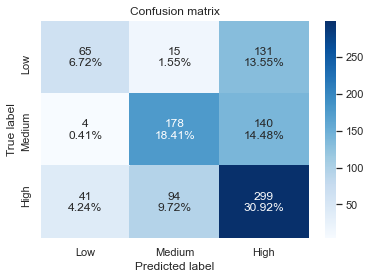

In [154]:
cm = confusion_matrix(Y_w_test,pred_w)
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)


sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')
plt.xticks([0.5,1.5,2.5],labels=['Low','Medium', 'High'])
plt.yticks([0.5,1.3,2.3],labels=['Low','Medium', 'High'])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Classification report

In [155]:
target_names = ['low', 'medium', 'high']
>>> print(classification_report(Y_w_test,pred_w, target_names=target_names))

              precision    recall  f1-score   support

         low       0.59      0.31      0.40       211
      medium       0.62      0.55      0.58       322
        high       0.52      0.69      0.60       434

    accuracy                           0.56       967
   macro avg       0.58      0.52      0.53       967
weighted avg       0.57      0.56      0.55       967



In [156]:
print("F1_score %s" %f1_score(Y_w_test,pred_w,average='micro'))

F1_score 0.5604963805584281


##### No-penalty coefficients

In [157]:
nopenalty_coeff_w=pd.DataFrame(mlr_model_w.coef_)

In [158]:
nopenalty_coeff_w.columns=col
nopenalty_coeff_w['class']=['low','medium','high']
nopenalty_coeff_w.set_index('class',inplace=True)

In [159]:
display(nopenalty_coeff_w)

0         1         2         3         4         5         6  \
class                                                                          
low     0.024336 -0.324621 -0.054721  0.215039 -0.237660  0.115867  0.130387   
medium  0.055934  0.474348  0.024189 -0.239997  0.105794 -0.046357 -0.151894   
high   -0.080270 -0.149727  0.030532  0.024958  0.131867 -0.069510  0.021507   

               7         8         9  
class                                 
low     0.858145  0.014335  0.188182  
medium -0.957044 -0.013913 -0.235993  
high    0.098899 -0.000423  0.047811

# Trees modeling part
## Classification with pycaret

In [160]:
#pip install pycaret

In [161]:
from pycaret.classification import *   #(pip install pycaret)

Firstly, with the exploitation of pycaret, which is a package that includes all the most important packages (i.e. numpy, scikit learn, spacy and so on), we setup an environment for the "white" dataset in order to quickly check which is the best model to fit our data in terms of accuracy. In fact, only by using the **compare_models()** function, we can obtain the validated accuracy for each model indicated in the function. Note that in the setup we define as well the test and train size.

In [162]:
#we consider the white dataset and set as target the column named "quality"
environment = setup(data = white,  target = 'quality', train_size=0.8)

In [163]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
catboost                   catboost.core.CatBoostClassifier   True

As we can see in the following chunk, we decided to sort by F1 score, which is the metric that we will consider during the modeling part, since it is more proper for unbalanced dataset

In [164]:
best_specific = compare_models(include = ['rf','et','gbc','lr','knn','svm','lda','qda','rbfsvm'],sort="F1") #use include or exclude

**Note**:these metrics are already validated with the test dataset obtained in the "setup" chunk.
At the first impact, the models that perform better are the ones built with tree classifiers.
This aspect may be due to the fact that some variables may be collinear or iterating with eachothers. Tipically, tree-based models are not affected by iterations. 
So we start to work with tree models.




### Models creation
#### Extra Trees
An extra trees model is based on decision trees. By putting together a lot of decision trees (weak learners) you create a very good predictor (strong learner).
All the data available in the training set is used to built each stump.
To form the root node or any node, the best split is determined by searching in a subset of randomly selected features of size sqrt(number of features). The split of each selected feature is chosen at random.

The features and splits are selected at random

In [165]:
#definition of extra trees model with pycaret
et = create_model('et') #by default, CV with 10 folds

In [166]:
#the hyperparameters used by the above model are:
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1418, verbose=0,
                     warm_start=False)

Since the hyperparameters defined above are the default ones, we have to tune them.
Note that pycaret uses the Random Grid Search, and samples randomly parameters from a default grid.
Let's try to use these default values:

In [167]:
random.seed(42)
# tune hyperparameters of decision tree with 10 iterations.
#Remind that pycaret operates with random grid search sampling values from a default grid
tuned_et = tune_model(et, optimize= "f1",n_iter=10)

At the first sight the result is really poor. This may be caused by the low number of samples taken by the default grid (n_iter=10). Let's try to increase this hyperparamether to 100:

In [168]:
random.seed(42)
# tune hyperparameters of decision tree with 100 iterations
tuned_et = tune_model(et, optimize= "f1",n_iter=100)

In [169]:
random.seed(42)
# tune hyperparameters of decision tree with 100 iterations
tuned_et = tune_model(et, optimize= "F1",n_iter=200)

Even with 200 samples from the default grid, the model is worse compared to the one created at the beginning by pycaret (with default hyperparameters).
We then put aside the random grid search approach to adopt the Grid search one. With this tuning method we define a grid of values for each hyperparameter, and all combinations will be checked to get the best combination for the model.

In [170]:
param_grid={
        'n_estimators': range(50,301,25), #number of trees considered 
        'min_samples_leaf': range(1,5,1), #minimum number of splits from each node
        'min_samples_split': range(1,5,1)} #minimum number of obs before splitting a node

In [171]:
#defining train and test for white dataset
from sklearn.model_selection import train_test_split
x=white.drop(["quality"], axis=1)
y=white["quality"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state=42)

In [173]:
#tuning
from sklearn.ensemble import ExtraTreesClassifier
et3=ExtraTreesClassifier(random_state=42)
cv_tuning = GridSearchCV(et3, param_grid, scoring='f1_micro', return_train_score=True, cv=5)
cv_tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [174]:
#the best combination is:
print(cv_tuning.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 225}


In [175]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, cv_tuning.predict(X_test)
print(classification_report(y_true, y_pred))
#WOW!!!  


              precision    recall  f1-score   support

           0       0.76      0.75      0.75       322
           1       0.70      0.76      0.73       434
           2       0.80      0.67      0.73       211

    accuracy                           0.74       967
   macro avg       0.75      0.73      0.74       967
weighted avg       0.74      0.74      0.74       967



As we can see, the result has increased a lot!
The Extra trees and the random forest classifiers can return the variables importance. Let's visualize it:

In [176]:
#Our final model is:
et3=ExtraTreesClassifier(min_samples_leaf= 1, min_samples_split= 3, n_estimators= 150) #substituted the best combination
et3.fit(X_train, y_train)
print(et3.feature_importances_)

[0.07718366 0.09971679 0.08212796 0.08433292 0.07868865 0.10189205
 0.08316829 0.07715598 0.14569101 0.07843117 0.09161151]


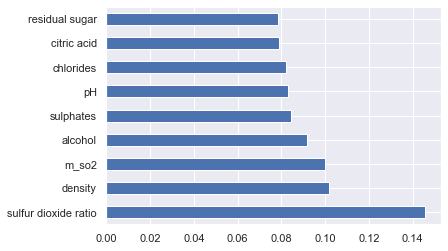

In [267]:

feat_importances = pd.Series(et3.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

The most important variables are alcohol, density and volatile acidity for the extra trees model.

#### Random Forest
Let's do the same with random forest to check the metric values.
The random forest is created by using the following criterea:
* A bootstrap will be created by randomly sampling the training set with replacement. The size of the bootstrap is set to equal the size of the training set.
* To form the root node or any node, the best split is determined by searching in a subset of randomly selected features of size sqrt(number of features). In our case, each decision node is allowed to inspect two out of the four features.

For each of these selected features, the algorithm searches for the optimal cutting point to determine the split for the given feature. The feature from the randomly selected subset that produces the purest split is then used to create the root node.

In [178]:
param_grid = {
    'min_samples_split': [8, 10, 12],
    'n_estimators': range(50,301,50),
    'min_samples_leaf': range(5,10,1),
}

In [179]:
#tuning
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True,random_state=42)
cv_tuning = GridSearchCV(rf, param_grid, scoring='f1_micro', return_train_score=True, cv=5) 
cv_tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [180]:
#the best combination is:
print(cv_tuning.best_params_)

{'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 300}


In [181]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, cv_tuning.predict(X_test)
print(classification_report(y_true, y_pred))
#good as well

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       322
           1       0.64      0.75      0.69       434
           2       0.73      0.55      0.62       211

    accuracy                           0.68       967
   macro avg       0.70      0.66      0.67       967
weighted avg       0.69      0.68      0.68       967



In [182]:
#our final model for RF is:
RF=RandomForestClassifier(min_samples_leaf= 5, min_samples_split= 10, n_estimators= 200)
RF.fit(X_train, y_train)
print(RF.feature_importances_)

[0.06043226 0.11429833 0.07514487 0.08188599 0.07882286 0.11139708
 0.07800912 0.06194182 0.16151341 0.0798677  0.09668658]


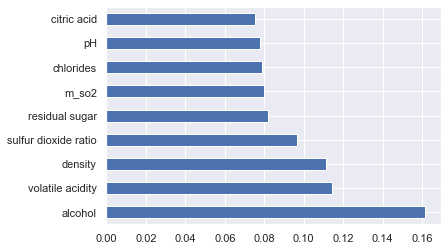

In [269]:
feat_importances = pd.Series(RF.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

There are low differences in metrics between RF and ET. The most important variables are the same for both models

### Now we start to work with the red wine dataset
Let's follow the same approach as before

In [184]:
environment_red = setup(data = red,  target = 'quality')

In [185]:
best_specific_red= compare_models(include = ['rf','et','gbc','lr','ridge'],sort="F1")

In [186]:
#defining train and test for white dataset
from sklearn.model_selection import train_test_split
x_r=red.drop(["quality"], axis=1)
y_r=red["quality"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_r, y_r, test_size=0.2, stratify=y_r, random_state=42)

In [187]:
param_grid={
        'n_estimators': range(50,301,25),
        'min_samples_leaf': range(5,10,1),
        'min_samples_split': range(5,10,1)}

In [188]:
#tuning
et_r=ExtraTreesClassifier(random_state=42)
cv_tuning = GridSearchCV(et_r, param_grid, scoring='f1_micro', return_train_score=True, cv=5)
cv_tuning.fit(X_train_r, y_train_r)


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [189]:
#the best combination is:
print(cv_tuning.best_params_)

{'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 150}


In [190]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test_r, cv_tuning.predict(X_test_r)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       149
           1       0.62      0.57      0.59       128
           2       0.76      0.37      0.50        43

    accuracy                           0.68       320
   macro avg       0.70      0.60      0.63       320
weighted avg       0.68      0.68      0.67       320



In [191]:
#Our final model is:
et_r=ExtraTreesClassifier(min_samples_leaf= 5, min_samples_split= 9, n_estimators= 150)
et_r.fit(X_train_r, y_train_r)
print(et_r.feature_importances_)

[0.057772   0.11896368 0.07668119 0.03708137 0.03076044 0.07539374
 0.04345315 0.12969794 0.27002606 0.05276012 0.10741031]


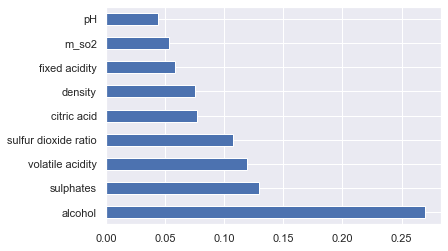

In [192]:
feat_importances = pd.Series(et_r.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

As we can see in the classification report, we have really low quality prediction for the "high" category. This is caused by the fact that our red dataset is very unbalanced, and we have just few observations for this category. 
The most important variables are alcohol, sulphates and volatile acidity
Now we try to train a random forest.

In [193]:
param_grid = {
    'min_samples_split': [8, 10, 12],
    'n_estimators': range(50,301,50),
    'min_samples_leaf': range(5,10,1),
}

In [194]:
#tuning
rf_r=RandomForestClassifier(bootstrap=True,random_state=42)
cv_tuning = GridSearchCV(rf_r, param_grid, scoring='f1_micro', return_train_score=True, cv=5) 
cv_tuning.fit(X_train_r, y_train_r)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [195]:
#the best combination is:
print(cv_tuning.best_params_)

{'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 250}


In [196]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test_r, cv_tuning.predict(X_test_r)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       149
           1       0.67      0.67      0.67       128
           2       0.72      0.49      0.58        43

    accuracy                           0.73       320
   macro avg       0.72      0.67      0.69       320
weighted avg       0.73      0.73      0.72       320



In [197]:
#our final model for RF is:
RF_r=RandomForestClassifier(min_samples_leaf= 5, min_samples_split= 8, n_estimators= 200)
RF_r.fit(X_train_r, y_train_r)
print(RF_r.feature_importances_)

[0.06647508 0.10917531 0.06963734 0.05171509 0.0660378  0.08034271
 0.05708    0.13156235 0.20134092 0.07885961 0.0877738 ]


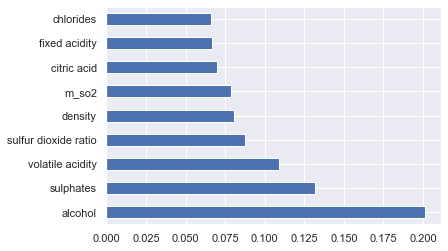

In [198]:
feat_importances = pd.Series(RF_r.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

The most important variables are alcohol, sulphates and volatile acidity: the same variables as before

#### Gradient Boosting Classifier

Boosting is a special type of Ensemble Learning technique that works by combining 
several weak learners(predictors with poor accuracy) into a strong learner
(a model with strong accuracy). This works by each model paying attention to its 
predecessor’s mistakes.
the fascinating idea behind Gradient Boosting is that instead of fitting a predictor 
on the data at each iteration, it actually fits a new predictor to the residual errors 
made by the previous predictor.

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5853154084798345

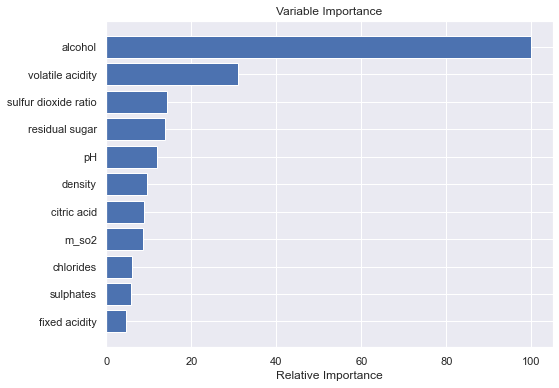

In [222]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [202]:
param_grid={
        'n_estimators':range(80,121,20),
        'max_depth':range(9,14,2),
        'min_samples_split':range(100,301,100)}

In [203]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(random_state=42)
cv_tuning = GridSearchCV(gbc, param_grid, scoring='f1_micro', return_train_score=True, cv=5)
cv_tuning.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [204]:
print(cv_tuning.best_params_)

{'max_depth': 11, 'min_samples_split': 100, 'n_estimators': 120}


In [205]:
#the result is not as the extra-tree classifier but still good
from sklearn.metrics import classification_report
y_true, y_pred = y_test, cv_tuning.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       322
           1       0.68      0.73      0.70       434
           2       0.74      0.66      0.70       211

    accuracy                           0.71       967
   macro avg       0.72      0.70      0.71       967
weighted avg       0.71      0.71      0.71       967



#### Gradient Boosting on Red dataset

In [206]:
clf_red = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_r, y_train_r)
clf_red.score(X_test_r, y_test_r)

0.68125

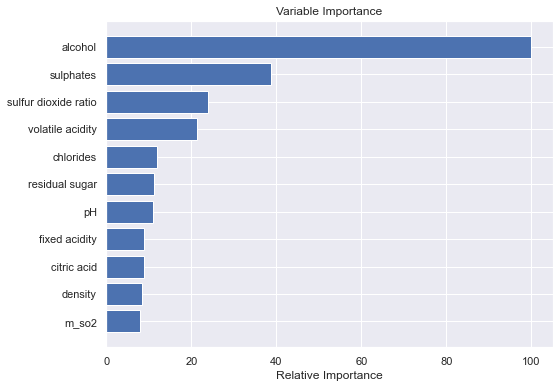

In [221]:
feature_importance = clf_red.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train_r.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [208]:
#grid search su red
param_grid={
        'n_estimators':range(80,121,20),
        'max_depth':range(9,14,2),
        'min_samples_split':range(20,201,20)}

In [209]:
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(random_state=42)
cv_tuning = GridSearchCV(gbc, param_grid, scoring='f1_micro', return_train_score=True, cv=5)
cv_tuning.fit(X_train_r, y_train_r)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [210]:
print(cv_tuning.best_params_)

{'max_depth': 9, 'min_samples_split': 20, 'n_estimators': 120}


In [211]:
from sklearn.metrics import classification_report
Y_true, Y_pred = y_test_r, cv_tuning.predict(X_test_r)
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       149
           1       0.67      0.62      0.65       128
           2       0.64      0.65      0.64        43

    accuracy                           0.72       320
   macro avg       0.70      0.70      0.70       320
weighted avg       0.72      0.72      0.72       320



#### Bayesian grid search on white dataset

Bayesian Optimization provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the surrogate function, that is then searched efficiently with an acquisition function before candidate samples are chosen for evaluation on the real objective function.

In [212]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [213]:
#baysian search 
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram
from sklearn.pipeline import Pipeline

In [214]:
param_grid={'n_estimators':list(range(80,121,20)),
            'max_depth':list(range(9,14,2)),
            'min_samples_split':list(range(20,201,20))}

In [215]:
#defining train and test for white dataset
from sklearn.model_selection import train_test_split
x=white.drop(["quality"], axis=1)
y=white["quality"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state=42)

In [216]:
import random
model=GradientBoostingClassifier(random_state=42)
opt = BayesSearchCV(model, param_grid, scoring='f1_micro', return_train_score=True, cv=5)
opt.fit(X_train, y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=3,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_iter...
    

In [217]:
print(opt.best_params_)

OrderedDict([('max_depth', 9), ('min_samples_split', 60), ('n_estimators', 120)])


In [218]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, opt.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       322
           1       0.67      0.73      0.70       434
           2       0.73      0.66      0.69       211

    accuracy                           0.71       967
   macro avg       0.71      0.70      0.70       967
weighted avg       0.71      0.71      0.71       967



### Conclusion

From the results of our analysis and the outputs of the models we can conclude that there are four important variables in common between red and white wines. 

1) **Alcohol**: An increase in alcohol tends to result in a higher quality wine.  This result is coherent throughout all our analysis for both red and white wines. 
Alcohol concentration of wine is important for various reasons. Besides its psychological and physiological effects on health, ethanol is indispensable for the aging, stability and organoleptic properties of wine. Ethanol influences the types and amounts of aromatic components by impressing the metabolic activity of yeasts. The growth of microorganisms is limited when alcohol content is high during fermentation. 
Alcohol concentration can be increased or decreased by monitoring the grape sugar concentration prior to the harvest. 

2 ) **Volatile acidity** is the quantity of acetic acid present in wine: therefore it has a negative impact on wine quality, since acetic acid is the key ingredient in vinegar. The reasons behind an abnormal (higher) value of volatile acidity are: bad fermentation, bad condition of grapes, absent/ not enough Sulphur dioxide (used against bacterial infection).  
In fact, in exploratory analysis and in the logistic regression coefficients we detected that higher levels of volatile acidity are associated to low quality wines.  
Volatile acidity is produced during fermentation and should be controlled by monitoring lactic bacteria activity.

3) **Sulphur dioxide ratio**: we computed this ratio as Free / Total Sulphur dioxide.  Free Sulphur dioxide is the quantity of SO2 to add to the solution to prevent infections, but also to maintain the organoleptic properties of wine: a proper quantity of sulphur dioxide contributes to good quality wines. Since it is added in higher quantities in white wines with respect to red, a large addition in white can result in distortion of flavor and health problems; this risk is too high for white rather than red wines. 
It should be added in a quantity such that good qualities are preserved without causing health problems to the drinkers.  
 
4) **Sulfites** are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine. sulphates correspond to total Sulphur dioxide. red wines need a lower quantity of sulphates to protect wine during production and maturation; for this reason an exceeding quantity of sulfites causes a reduction their quality. 

ONLY FOR WHITE WINE:   
**Residual sugar**: sugar that remains in wine after the fermentation process; its levels are more important in white wine, where the equilibrium between the freshness and sweet taste is more appreciated. 
Residual sugar could be raised by suspending the sugar fermentation carried out by yeasts. 

FINAL CONSIDERATION:   
*Molecular $SO_2$* didn’t turn out to be significative in our analysis because it is determined by  Ph and free sulfur: it’s sufficient to adjust these two quantities in order to reach a good quality. 


### Further developments

- Study of outliers in detail in order to understand which ones are abnormal besides the ones we have spotted. For instance, run the models with and then without outliers: if the output models are different, this means that outliers were problematic.  
- Study of correlation: run models without some variables that showed mild correlation to see if there are any changes in the models.    
- Perform oversampling on the classes in order to rebalance them further and improve prediction accuracy of the models.   

- Further with respect to our analysis, run very flexible models such as SVM, NN, KNN in order to focus primarily on prediction accuracy rather than interpretability (even though the sample size is maybe too little). A very accurate model, in the case of a wine producer, could reduce his costs as he could get rid of wine tasters to determine wine quality. 